In [ ]:
import sys
print(sys.version)


3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


In [ ]:
! pip install kaggle

In [ ]:
# configuring the path of Kaggle json file
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
#API to fetch dataset from kaggle
!kaggle datasets download -d suchintikasarkar/sentiment-analysis-for-mental-health

Dataset URL: https://www.kaggle.com/datasets/suchintikasarkar/sentiment-analysis-for-mental-health
License(s): DbCL-1.0
 81% 9.00M/11.1M [00:00<00:00, 73.9MB/s]
100% 11.1M/11.1M [00:00<00:00, 83.2MB/s]


In [ ]:
# extracting the compressed dataset

from zipfile import ZipFile
dataset = '/content/sentiment-analysis-for-mental-health.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk

# 1. Importing Libraries and Reading Data

In [ ]:
pip uninstall tensorflow tensorflow-text tensorflow-hub -y

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
Found existing installation: tensorflow-text 2.15.0
Uninstalling tensorflow-text-2.15.0:
  Successfully uninstalled tensorflow-text-2.15.0
Found existing installation: tensorflow-hub 0.16.1
Uninstalling tensorflow-hub-0.16.1:
  Successfully uninstalled tensorflow-hub-0.16.1


In [ ]:
pip install tensorflow==2.15.0 tensorflow-text==2.15.0 tensorflow-hub==0.16.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 91.6 MB/s eta 0:00:00


In [ ]:
!pip install imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.4 MB/s eta 0:00:00


In [ ]:
!pip install wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 7.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
import spacy
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from sklearn.utils import resample
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'
import warnings
warnings.filterwarnings('ignore')

In [ ]:
 # Load the Excel file into a DataFrame
df = pd.read_csv('/content/Combined Data.csv',encoding = 'ISO-8859-1')


In [ ]:
df

Unnamed: 0                                          statement   status
0               0                                         oh my gosh  Anxiety
1               1  trouble sleeping, confused mind, restless hear...  Anxiety
2               2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3               3  I've shifted my focus to something else but I'...  Anxiety
4               4  I'm restless and restless, it's been a month n...  Anxiety
...           ...                                                ...      ...
53038       53038  Nobody takes me seriously Iâve (24M) dealt w...  Anxiety
53039       53039  selfishness  "I don't feel very good, it's lik...  Anxiety
53040       53040  Is there any way to sleep better? I can't slee...  Anxiety
53041       53041  Public speaking tips? Hi, all. I have to give ...  Anxiety
53042       53042  I have really bad door anxiety! It's not about...  Anxiety

[53043 rows x 3 columns]

<ipython-input-10-ff4903b8ef9f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='status', palette=vibrant_colors)  # Using custom vibrant colors


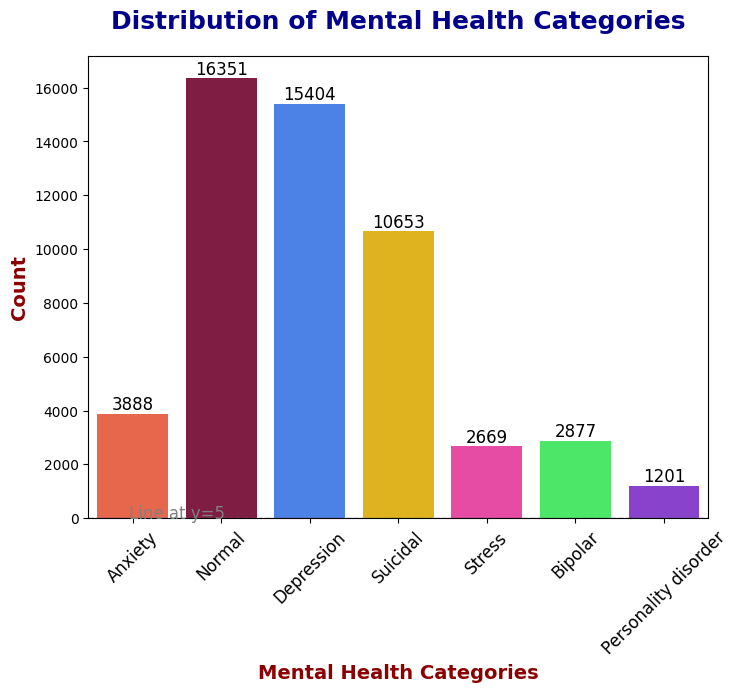

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distinct vibrant colors for each category (replacing vibrant orange with a vibrant purple)
vibrant_colors = ['#FF5733', '#900C3F', '#337AFF', '#FFC300', '#FF33A6', '#33FF57', '#8A2BE2']  # Unique and vibrant colors

# Countplot of the 'status' column
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='status', palette=vibrant_colors)  # Using custom vibrant colors

# Adding lines for clarity and annotating bars
for p in ax.patches:  # Loop through the patches (bars)
    ax.annotate(f'{int(p.get_height())}',  # Convert height to integer for annotation
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position on top of the bar
                ha='center', va='bottom', fontsize=12, color='black')  # Centered annotation

# Draw horizontal lines for a specific y-value
plt.axhline(y=5, color='grey', linestyle='--', linewidth=1)  # Example line at y=5
plt.text(0.5, 5.5, 'Line at y=5', color='grey', ha='center', fontsize=12)  # Add a label for the line

# Title and labels
plt.title('Distribution of Mental Health Categories', fontsize=18, weight='bold', color='darkblue', pad=20)
plt.xticks(rotation=45, fontsize=12)
plt.xlabel('Mental Health Categories', fontsize=14, weight='bold', color='darkred')
plt.ylabel('Count', fontsize=14, weight='bold', color='darkred')

# Show the plot
plt.show()


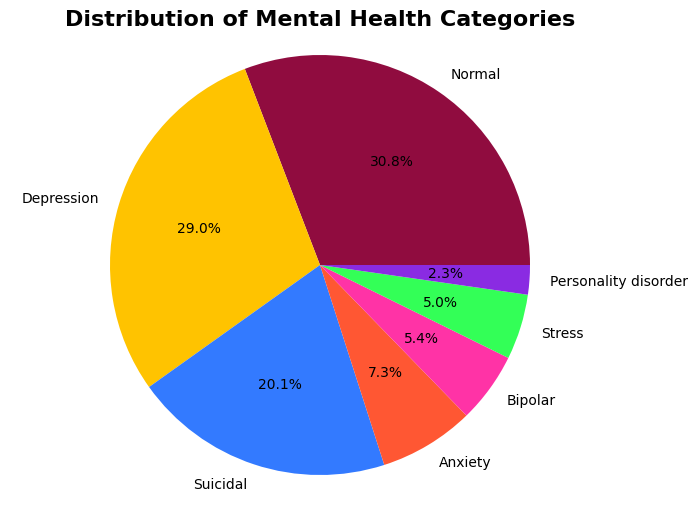

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pie chart for status distribution
status_counts = df['status'].value_counts()

# Define vibrant colors with Anxiety and Depression swapped
vibrant_colors = ['#900C3F', '#FFC300', '#337AFF', '#FF5733', '#FF33A6', '#33FF57', '#8A2BE2']  # Anxiety with Depression swapped

plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=vibrant_colors)
plt.title('Distribution of Mental Health Categories', fontsize=16, weight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


Word Count Distribution in the 'statement' Column


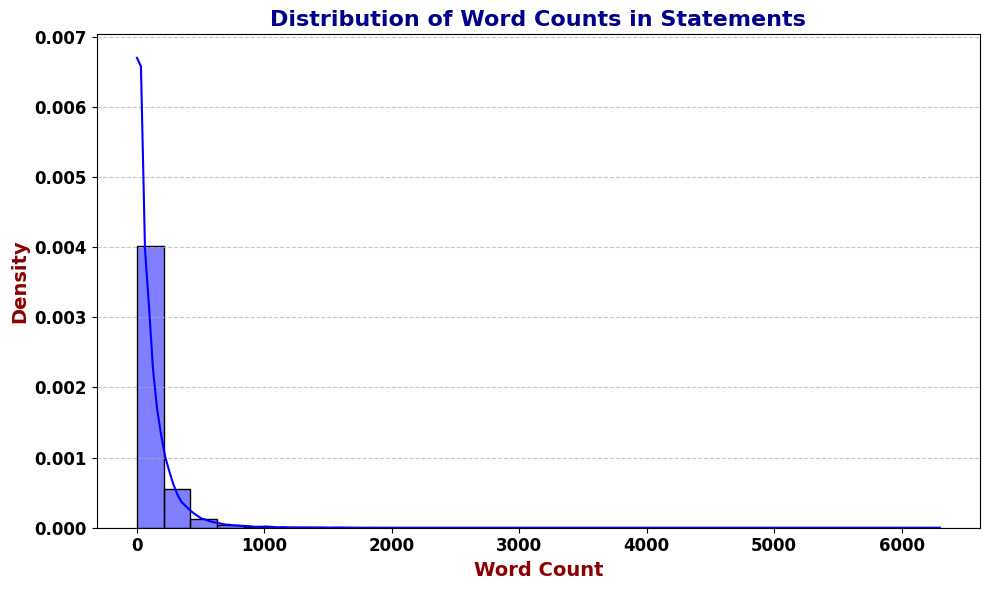

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adding a column for word count in the 'statement' column
df['word_count'] = df['statement'].apply(lambda x: len(str(x).split()))

# Plotting word count distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=30, kde=True, color='blue', stat='density')

# Enhancing the aesthetics
plt.title('Distribution of Word Counts in Statements', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Word Count', fontsize=14, weight='bold', color='darkred')
plt.ylabel('Density', fontsize=14, weight='bold', color='darkred')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.axhline(0, color='gray', linewidth=0.8)  # Add a horizontal line at y=0 for clarity
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


In [ ]:
print('The datatype and other basic info about the dataset are as follows:')
df.info()
print('*'*50)
print(f'The shape of the dataset is: {df.shape}')
print('*'*50)
print(f'The columns in the dataset are: {df.columns}')

The datatype and other basic info about the dataset are as follows:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
 3   word_count  53043 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.6+ MB
**************************************************
The shape of the dataset is: (53043, 4)
**************************************************
The columns in the dataset are: Index(['Unnamed: 0', 'statement', 'status', 'word_count'], dtype='object')


1. Both 'statement' and 'status' are of datatype 'O'.
2. Column 'Unnamed: 0' seems unwanted.
3. There seems null values in 'statement'.

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace =True)
df.reset_index(drop=True)
df.head()

statement   status  word_count
0                                         oh my gosh  Anxiety           3
1  trouble sleeping, confused mind, restless hear...  Anxiety          10
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety          14
3  I've shifted my focus to something else but I'...  Anxiety          11
4  I'm restless and restless, it's been a month n...  Anxiety          14

In [ ]:
df.shape

(53043, 3)

In [ ]:
df

statement   status  word_count
0                                             oh my gosh  Anxiety           3
1      trouble sleeping, confused mind, restless hear...  Anxiety          10
2      All wrong, back off dear, forward doubt. Stay ...  Anxiety          14
3      I've shifted my focus to something else but I'...  Anxiety          11
4      I'm restless and restless, it's been a month n...  Anxiety          14
...                                                  ...      ...         ...
53038  Nobody takes me seriously Iâve (24M) dealt w...  Anxiety         322
53039  selfishness  "I don't feel very good, it's lik...  Anxiety         198
53040  Is there any way to sleep better? I can't slee...  Anxiety          17
53041  Public speaking tips? Hi, all. I have to give ...  Anxiety          74
53042  I have really bad door anxiety! It's not about...  Anxiety          79

[53043 rows x 3 columns]

# 2. EDA and Data Preparation

In [ ]:
df.isnull().sum()


statement     362
status          0
word_count      0
dtype: int64

In [ ]:
for feature in df.columns:
    if df[feature].isnull().sum() >1:
        print(feature)
        print(f'The count of null values for is: {df[feature].isnull().sum()}')
        print(f'The percentage of null values is: {np.round(df[feature].isnull().mean(),4)}%')
        print('*'*50)

statement
The count of null values for is: 362
The percentage of null values is: 0.0068%
**************************************************


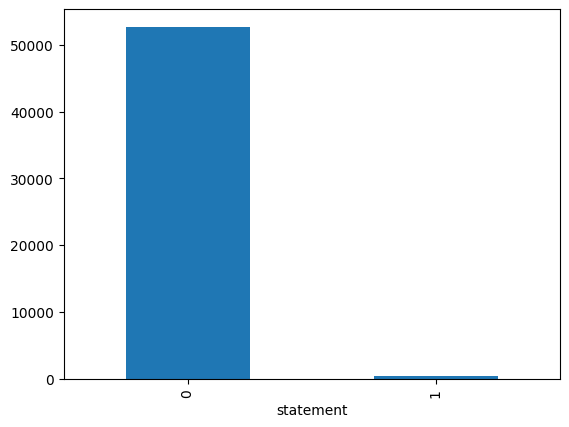

In [ ]:
for feature in df.columns:
    if df[feature].isnull().sum() >1:
        data = df.copy()

        data[feature] = np.where(df[feature].isnull(),1,0)
        data.groupby(feature)['status'].count().plot(kind='bar')

From the analysis it's clear that NaN values don't have much impact and can be dropped.

In [ ]:
df.dropna(inplace = True)
df.isnull().sum()

statement     0
status        0
word_count    0
dtype: int64

In [ ]:
df.shape

(52681, 3)

1. Majority of the population do not suffer from mental health issues.
2. Among the people suffering from mental health issues, depression and suidical is most common.
3. There can be relation between depression and suicide as most people suffering depression tend to get suicidal thoughts.

In [ ]:
df['statement_length'] = df['statement'].apply(len)
df['num_words'] = df['statement'].apply(lambda x: len(x.split()))
df['avg_word_length'] = np.round(df['statement_length'] / df['num_words'])
df['avg_word_length'] = df['avg_word_length'].map(int)
df['vocabulary_size'] = df['statement'].apply(lambda x: len(set(x.split())))
df.head()

statement   status  word_count  \
0                                         oh my gosh  Anxiety           3   
1  trouble sleeping, confused mind, restless hear...  Anxiety          10   
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety          14   
3  I've shifted my focus to something else but I'...  Anxiety          11   
4  I'm restless and restless, it's been a month n...  Anxiety          14   

   statement_length  num_words  avg_word_length  vocabulary_size  
0                10          3                3                3  
1                64         10                6               10  
2                78         14                6               13  
3                61         11                6               11  
4                72         14                5               14

In [ ]:
num_feature = [feature for feature in df.columns if df[feature].dtype != 'O']

num_feature

['word_count',
 'statement_length',
 'num_words',
 'avg_word_length',
 'vocabulary_size']

In [ ]:
df

statement   status  word_count  \
0                                             oh my gosh  Anxiety           3   
1      trouble sleeping, confused mind, restless hear...  Anxiety          10   
2      All wrong, back off dear, forward doubt. Stay ...  Anxiety          14   
3      I've shifted my focus to something else but I'...  Anxiety          11   
4      I'm restless and restless, it's been a month n...  Anxiety          14   
...                                                  ...      ...         ...   
53038  Nobody takes me seriously Iâve (24M) dealt w...  Anxiety         322   
53039  selfishness  "I don't feel very good, it's lik...  Anxiety         198   
53040  Is there any way to sleep better? I can't slee...  Anxiety          17   
53041  Public speaking tips? Hi, all. I have to give ...  Anxiety          74   
53042  I have really bad door anxiety! It's not about...  Anxiety          79   

       statement_length  num_words  avg_word_length  vocabulary_size  
0                    10          3                3                3  
1                    64         10                6               10  
2                    78         14                6               13  
3                    61         11                6               11  
4                    72         14                5               14  
...                 ...        ...              ...              ...  
53038              1796        322                6              217  
53039              1012        198                5              136  
53040                85         17                5               16  
53041               409         74                6               60  
53042               417         79                5               58  

[52681 rows x 7 columns]

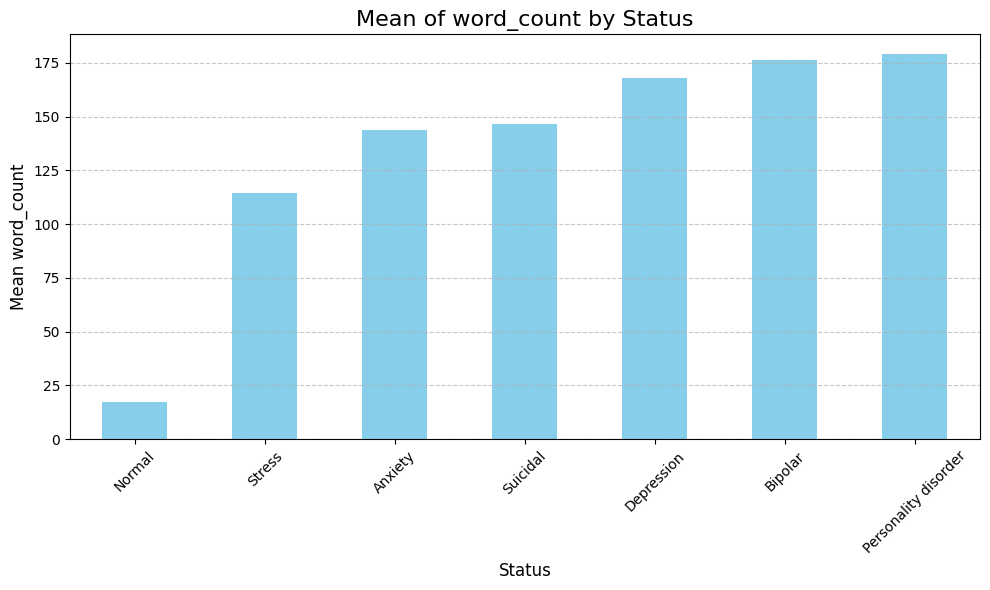

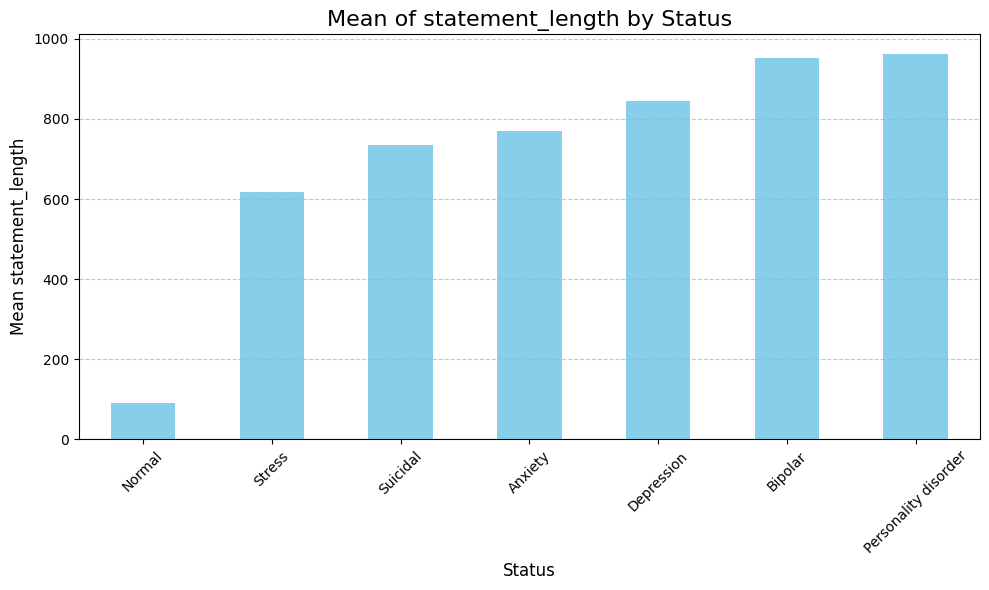

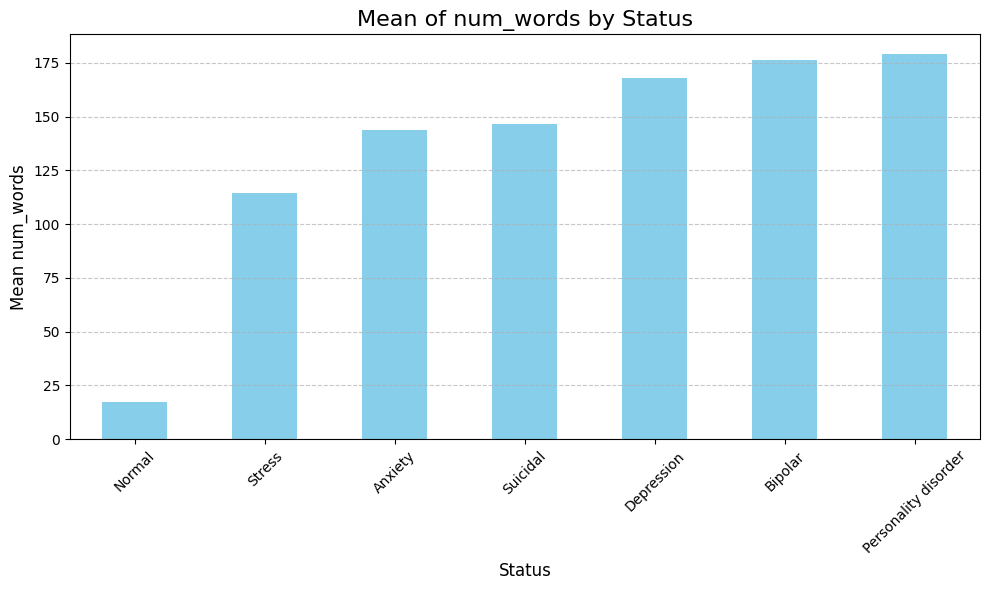

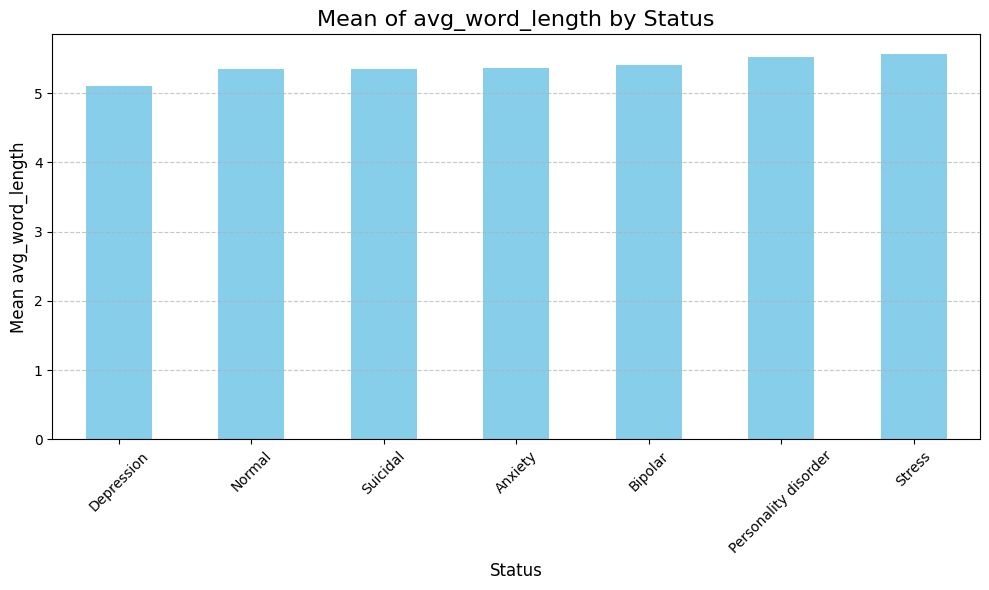

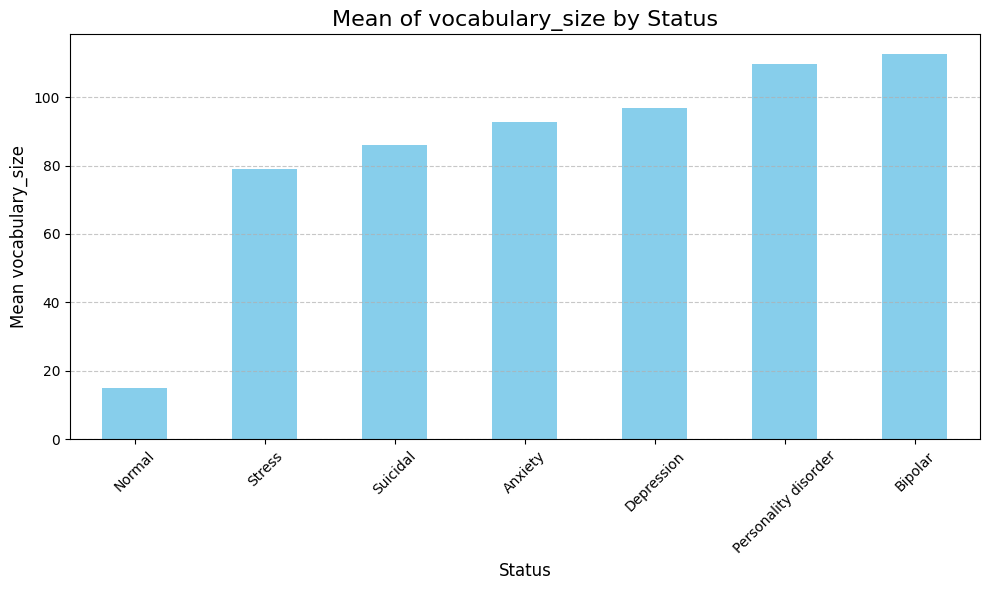

In [ ]:
import matplotlib.pyplot as plt

# Loop through each feature in the numerical feature list
for feature in num_feature:
    plt.figure(figsize=(10, 6))  # Set figure size for better clarity
    # Calculate the mean of the feature grouped by 'status' and sort values
    df.groupby('status')[feature].mean().sort_values().plot(kind='bar', color='skyblue')  # Bar plot for clarity

    # Adding title and labels
    plt.title(f'Mean of {feature} by Status', fontsize=16)  # Add a title
    plt.xlabel('Status', fontsize=12)
    plt.ylabel(f'Mean {feature}', fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add grid lines for better readability

    plt.tight_layout()  # Ensure the layout fits well
    plt.show()


It clearly seems like normal people speak the least since they don't have any mental health issues to explain.

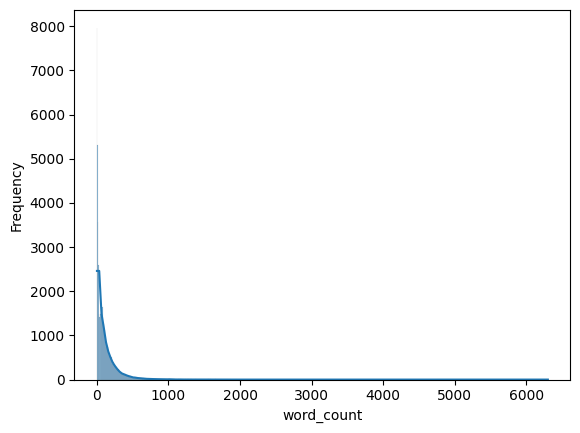

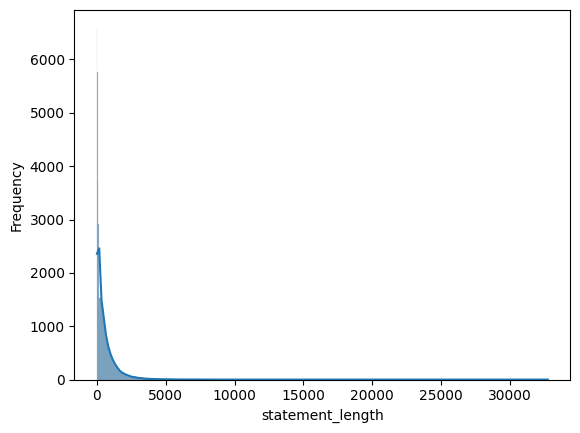

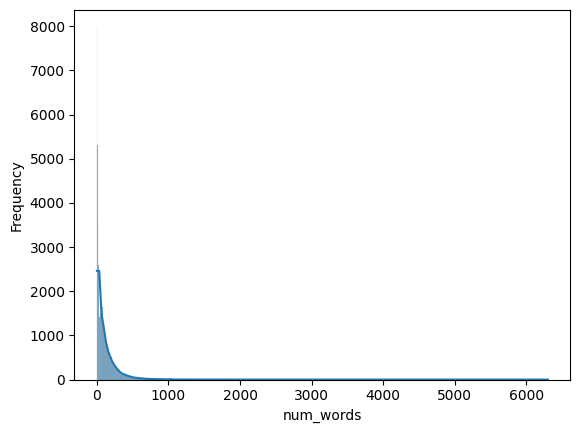

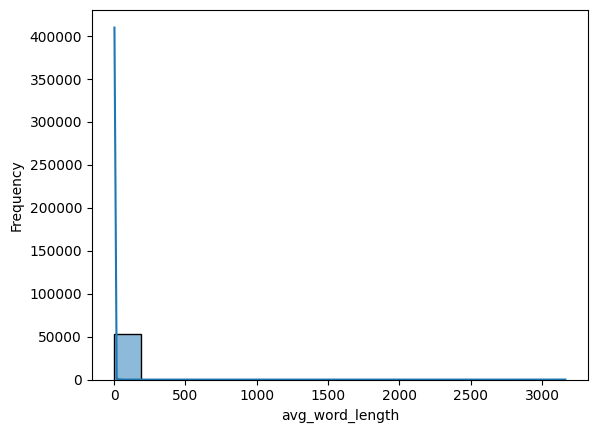

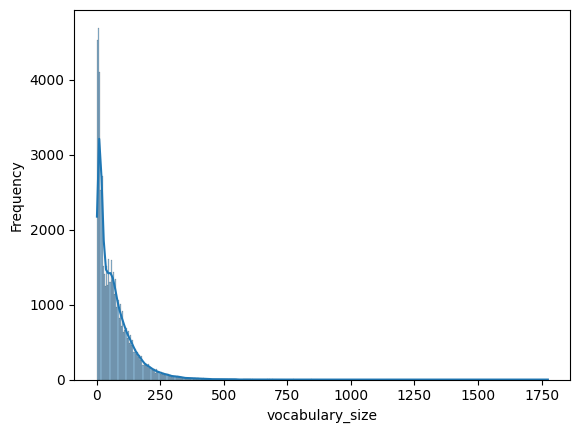

In [ ]:
for feature in num_feature:
    sns.histplot(data = df, x=feature,kde=True)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

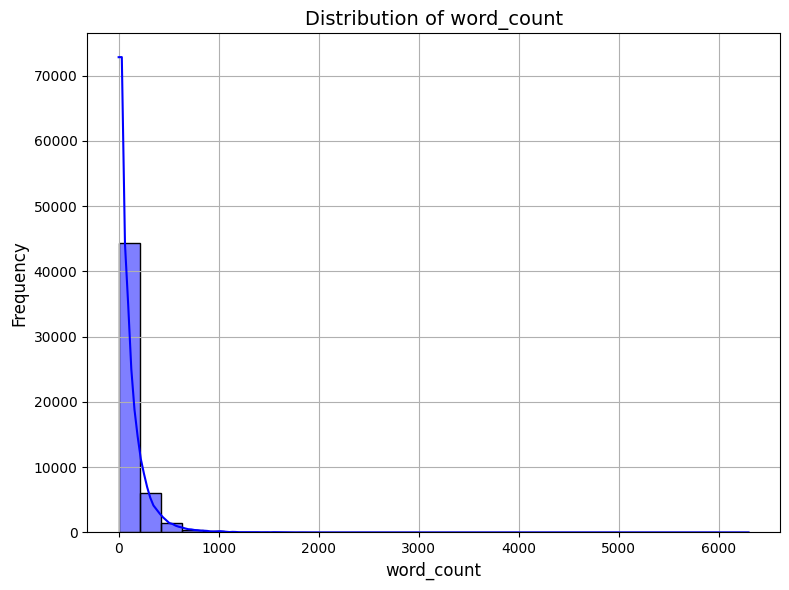

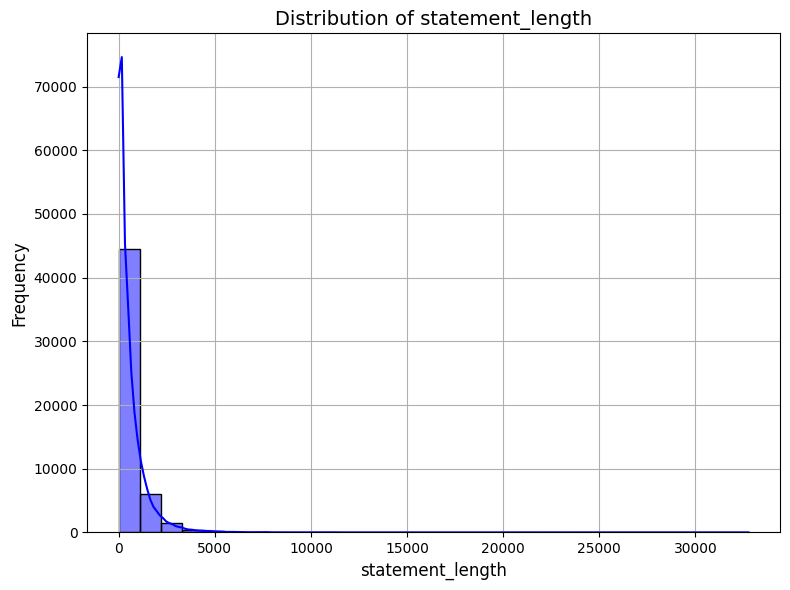

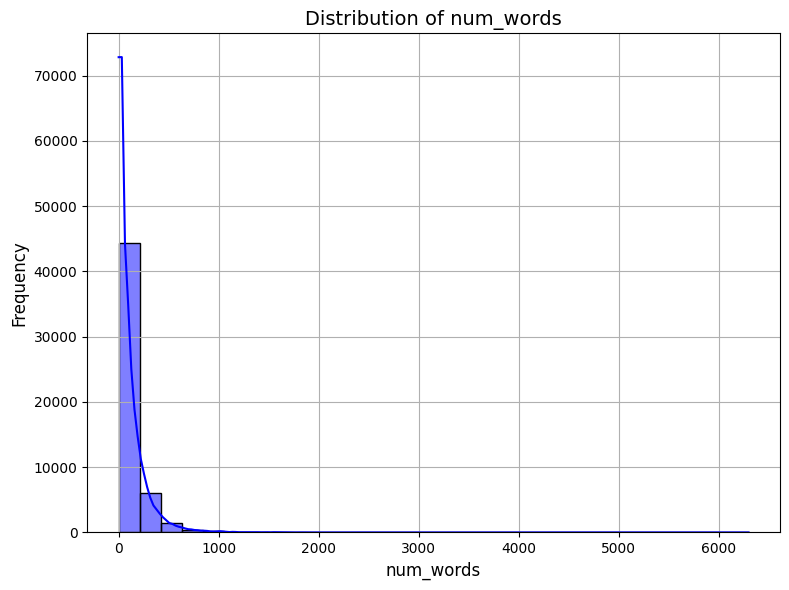

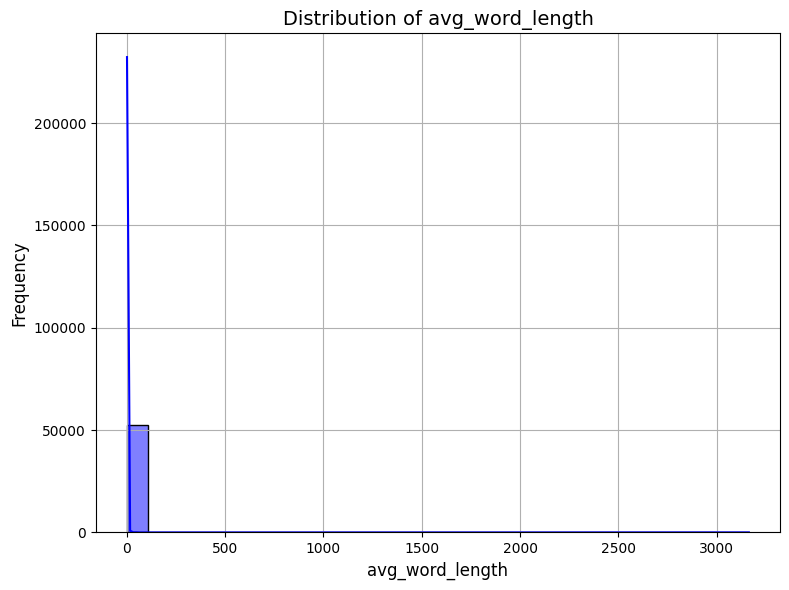

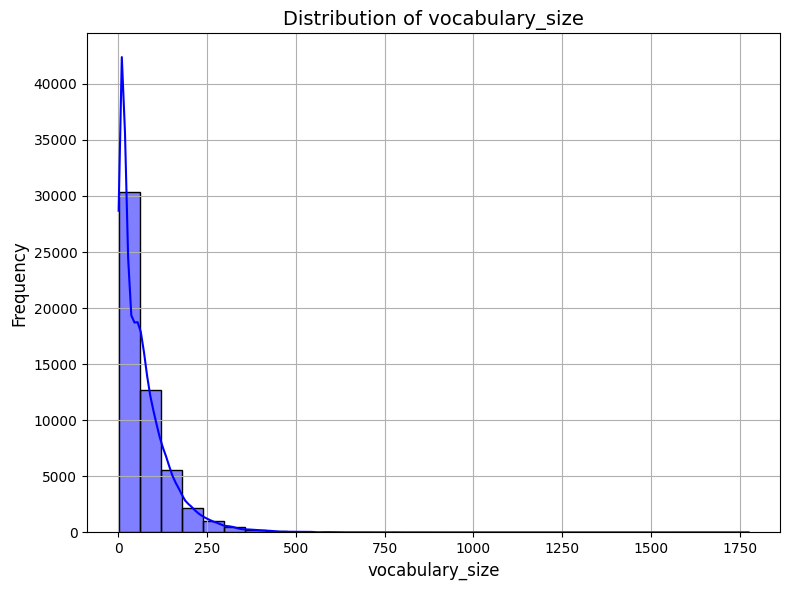

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each feature in the numerical feature list
for feature in num_feature:
    plt.figure(figsize=(8, 6))  # Set figure size for better clarity
    sns.histplot(data=df, x=feature, kde=True, color='blue', bins=30)  # You can adjust the number of bins

    # Adding labels and title
    plt.title(f'Distribution of {feature}', fontsize=14)  # Add a title
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    plt.grid(True)  # Optional: Add grid lines for better readability
    plt.tight_layout()  # Ensure the layout fits well
    plt.show()


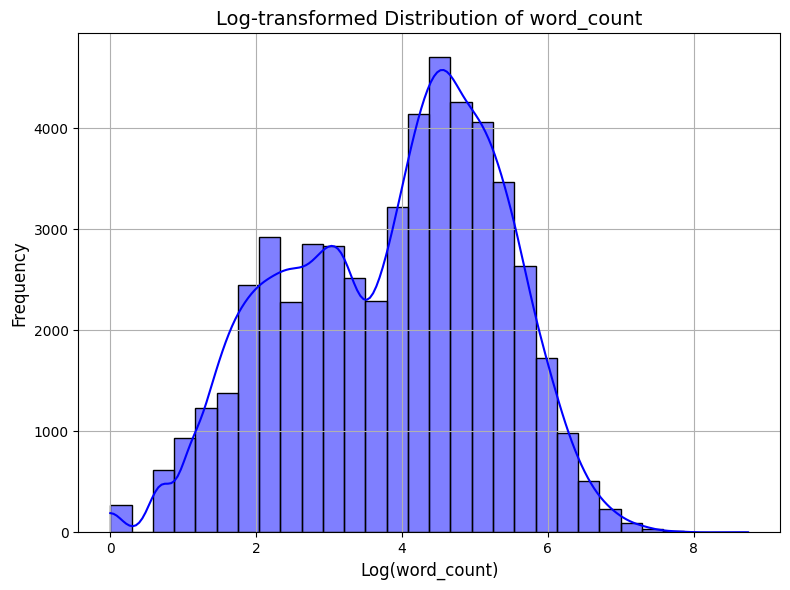

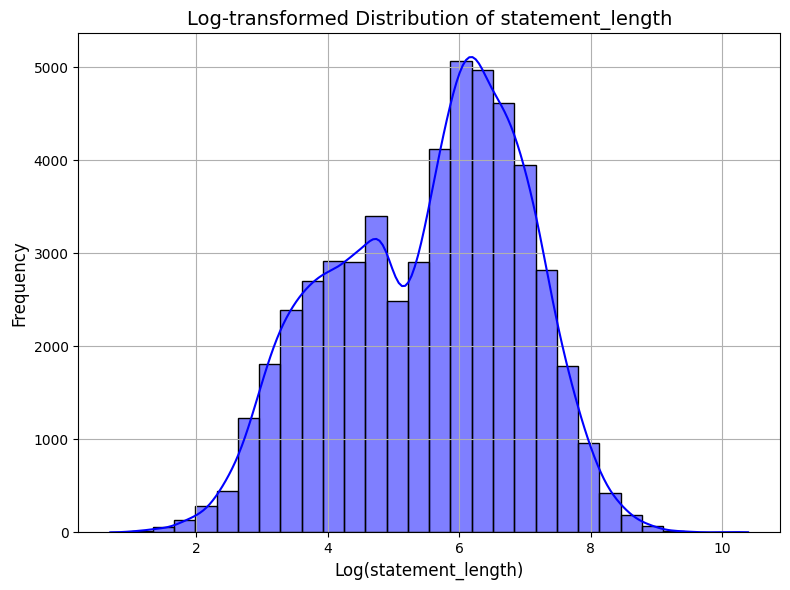

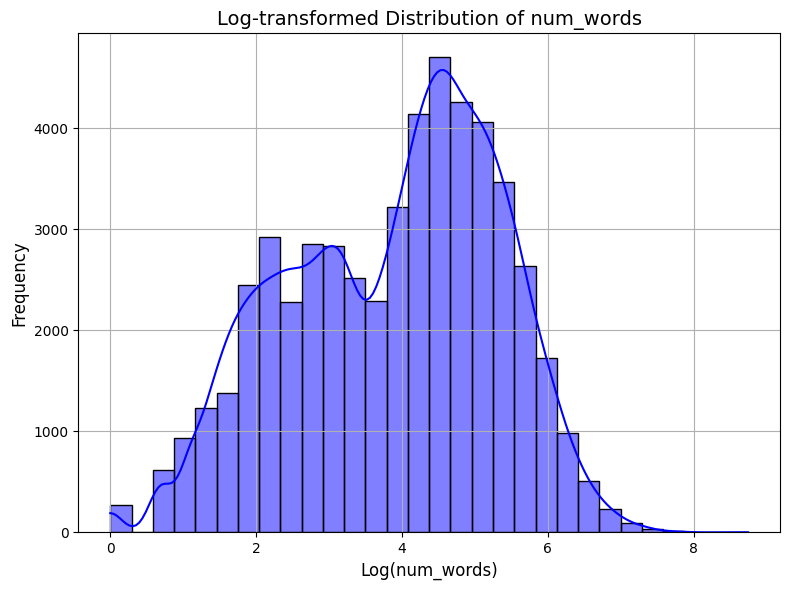

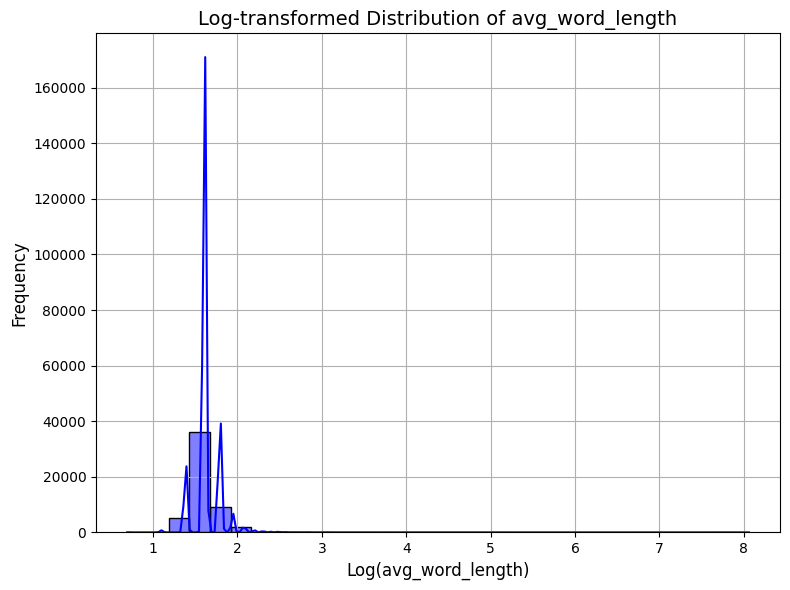

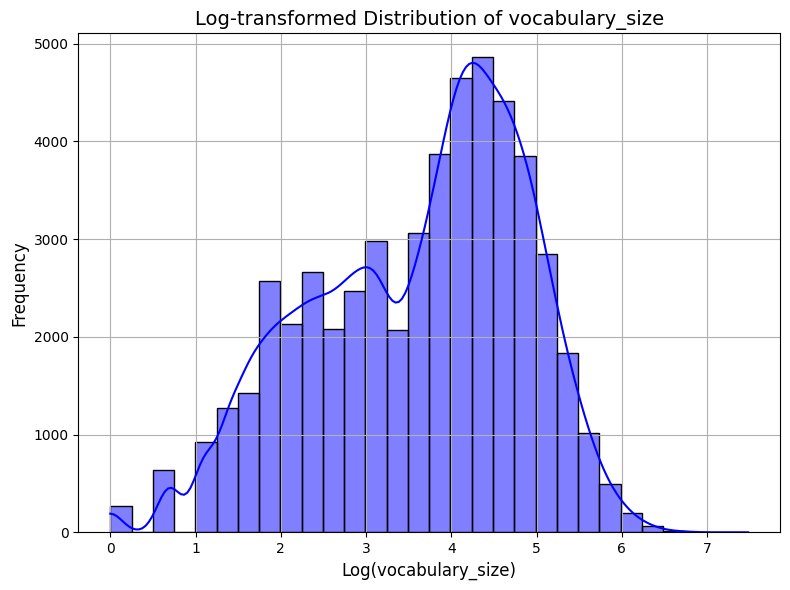

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loop through each feature in the numerical feature list
for feature in num_feature:
    # Create a copy of the DataFrame and log-transform the feature
    data = df.copy()
    # Apply log transformation; add a small constant to avoid log(0)
    data[feature] = np.log(data[feature] + 1e-9)  # Adding a small constant to avoid log(0)

    # Plotting the histogram with KDE
    plt.figure(figsize=(8, 6))  # Set figure size for better clarity
    sns.histplot(data=data, x=feature, kde=True, color='blue', bins=30)  # You can adjust the number of bins

    # Adding labels and title
    plt.title(f'Log-transformed Distribution of {feature}', fontsize=14)  # Add a title
    plt.xlabel(f'Log({feature})', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    plt.grid(True)  # Optional: Add grid lines for better readability
    plt.tight_layout()  # Ensure the layout fits well
    plt.show()


Looks heavily skewed to the right. This could introduce bias and impact performance of model. To remove the impact of outliers, log transformation is applied that makes the distribution centered and normalized.

In [ ]:
for feature in num_feature:
    df[feature] = np.log(df[feature])

df.head()

statement   status  word_count  \
0                                         oh my gosh  Anxiety    1.098612   
1  trouble sleeping, confused mind, restless hear...  Anxiety    2.302585   
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety    2.639057   
3  I've shifted my focus to something else but I'...  Anxiety    2.397895   
4  I'm restless and restless, it's been a month n...  Anxiety    2.639057   

   statement_length  num_words  avg_word_length  vocabulary_size  
0          2.302585   1.098612         1.098612         1.098612  
1          4.158883   2.302585         1.791759         2.302585  
2          4.356709   2.639057         1.791759         2.564949  
3          4.110874   2.397895         1.791759         2.397895  
4          4.276666   2.639057         1.609438         2.639057

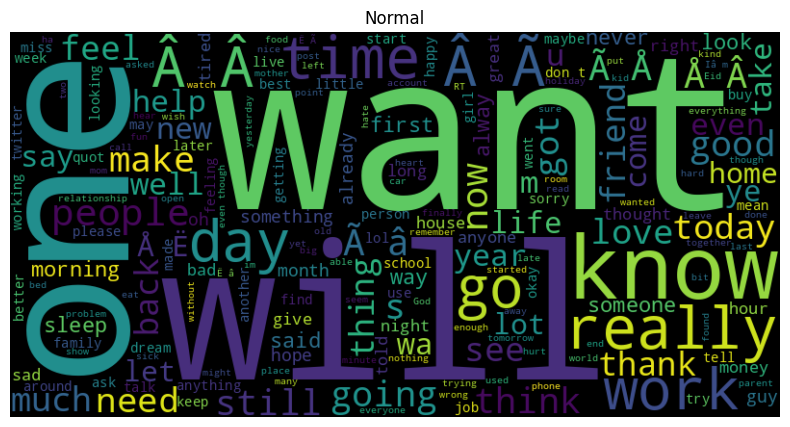

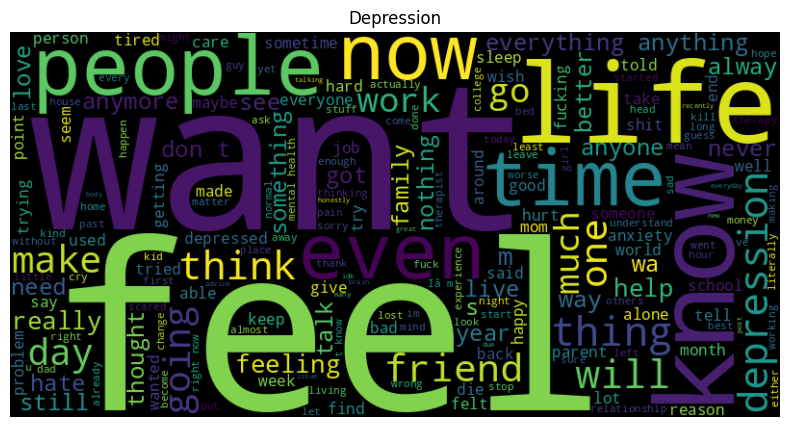

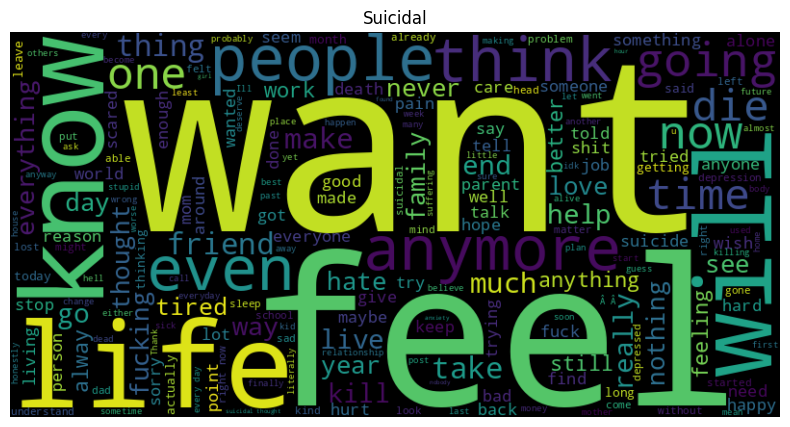

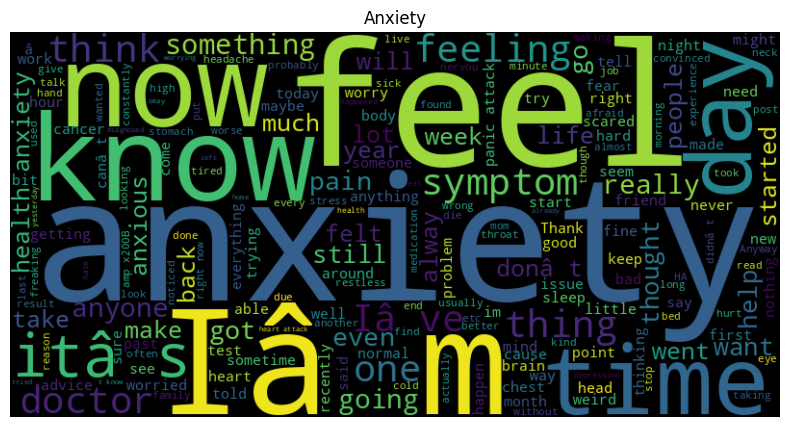

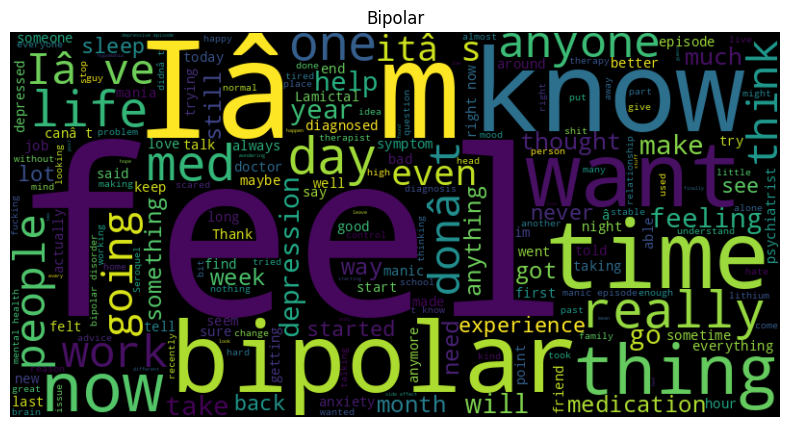

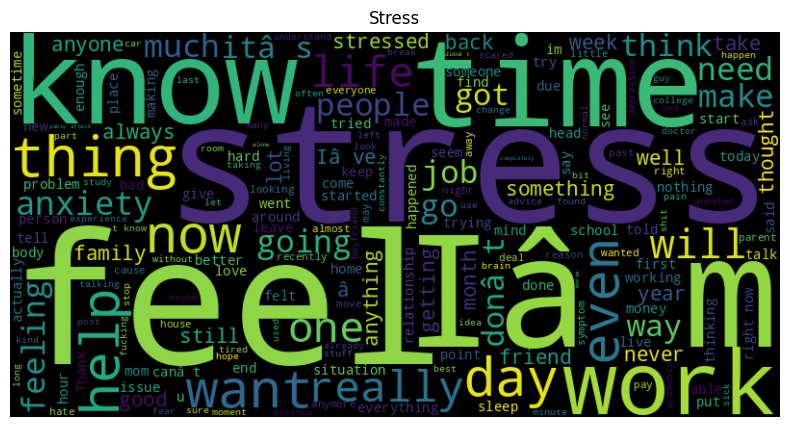

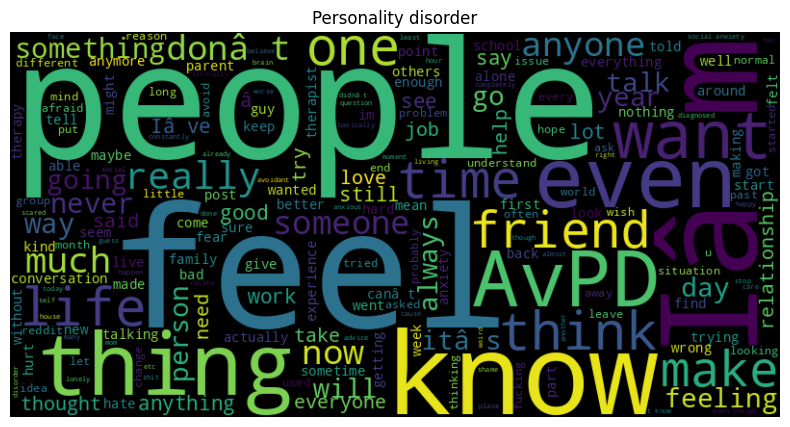

In [ ]:
from wordcloud import WordCloud
categories = df['status'].value_counts().index

for cat in categories:
    statements = " ".join(df[df['status']==cat]['statement'])

    wordcloud = WordCloud(width=800, height=400).generate(statements)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(cat)
    plt.axis('off')
    plt.show()

In [ ]:
#Converting Labels into numbers

label_ordered = df['status'].value_counts().index

label_ordered = {k:i for i,k in enumerate(label_ordered,0)}

df['status'] = df['status'].map(label_ordered)
df.head()

statement  status  word_count  \
0                                         oh my gosh       3    1.098612   
1  trouble sleeping, confused mind, restless hear...       3    2.302585   
2  All wrong, back off dear, forward doubt. Stay ...       3    2.639057   
3  I've shifted my focus to something else but I'...       3    2.397895   
4  I'm restless and restless, it's been a month n...       3    2.639057   

   statement_length  num_words  avg_word_length  vocabulary_size  
0          2.302585   1.098612         1.098612         1.098612  
1          4.158883   2.302585         1.791759         2.302585  
2          4.356709   2.639057         1.791759         2.564949  
3          4.110874   2.397895         1.791759         2.397895  
4          4.276666   2.639057         1.609438         2.639057

In [ ]:
df['status'].value_counts()

status
0    16343
1    15404
2    10652
3     3841
4     2777
5     2587
6     1077
Name: count, dtype: int64

In [ ]:
df.shape

(52681, 7)

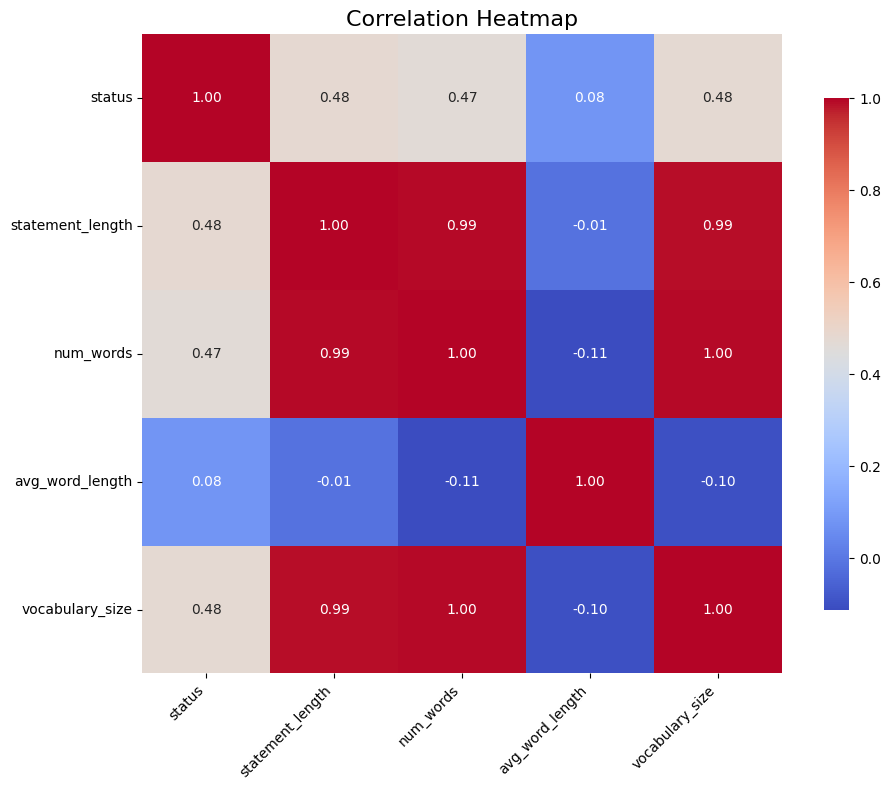

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
cm = df[['status', 'statement_length', 'num_words', 'avg_word_length', 'vocabulary_size']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))  # Adjust the figure size for better visibility

# Create a heatmap
sns.heatmap(cm, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})  # Change the color map

# Adding title and labels
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()  # Ensure the layout fits well

# Show the heatmap
plt.show()


#Data Pre Processing

In [ ]:
df

statement  status  word_count  \
0                                             oh my gosh       3    1.098612   
1      trouble sleeping, confused mind, restless hear...       3    2.302585   
2      All wrong, back off dear, forward doubt. Stay ...       3    2.639057   
3      I've shifted my focus to something else but I'...       3    2.397895   
4      I'm restless and restless, it's been a month n...       3    2.639057   
...                                                  ...     ...         ...   
53038  Nobody takes me seriously Iâve (24M) dealt w...       3    5.774552   
53039  selfishness  "I don't feel very good, it's lik...       3    5.288267   
53040  Is there any way to sleep better? I can't slee...       3    2.833213   
53041  Public speaking tips? Hi, all. I have to give ...       3    4.304065   
53042  I have really bad door anxiety! It's not about...       3    4.369448   

       statement_length  num_words  avg_word_length  vocabulary_size  
0              2.302585   1.098612         1.098612         1.098612  
1              4.158883   2.302585         1.791759         2.302585  
2              4.356709   2.639057         1.791759         2.564949  
3              4.110874   2.397895         1.791759         2.397895  
4              4.276666   2.639057         1.609438         2.639057  
...                 ...        ...              ...              ...  
53038          7.493317   5.774552         1.791759         5.379897  
53039          6.919684   5.288267         1.609438         4.912655  
53040          4.442651   2.833213         1.609438         2.772589  
53041          6.013715   4.304065         1.791759         4.094345  
53042          6.033086   4.369448         1.609438         4.060443  

[52681 rows x 7 columns]

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords

# Download stopwords from NLTK
nltk.download('stopwords')

# Define stopwords list
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # 3. Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)

    # 4. Remove stock market tickers like $GE
    text = re.sub(r'\$\w+', '', text)

    # 5. Remove hashtags
    text = re.sub(r'#\w+', '', text)

    # 6. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 7. Remove numbers
    text = re.sub(r'\d+', '', text)

    # 8. Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # 9. Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text
# Apply the clean_text function to the 'Caption' column
df['cleaned_text'] = df['statement'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re

# Function to perform additional cleaning after the initial text cleaning
def further_clean_text(text):
    # 1. Remove short words (less than 3 characters)
    text = ' '.join([word for word in text.split() if len(word) >= 3])

    # 2. Remove any non-alphabetic characters that might remain (e.g., symbols, numbers)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 3. Remove extra whitespace
    text = text.strip()

    # 4. Handling repeated letters (e.g., "soooo" to "so")
    text = re.sub(r'(.)\1+', r'\1\1', text)

    return text

# Apply the further cleaning function to the already cleaned text
df['further_cleaned_text'] = df['cleaned_text'].apply(further_clean_text)

# Display the first few rows of the newly cleaned text
df[['cleaned_text', 'further_cleaned_text']].head()

cleaned_text  \
0                                            oh gosh   
1  trouble sleeping confused mind restless heart ...   
2  wrong back dear forward doubt stay restless re...   
3  ive shifted focus something else im still worried   
4                im restless restless month boy mean   

                                further_cleaned_text  
0                                               gosh  
1  trouble sleeping confused mind restless heart ...  
2  wrong back dear forward doubt stay restless re...  
3     ive shifted focus something else still worried  
4                   restless restless month boy mean

In [ ]:
from nltk.stem import PorterStemmer  # Import the PorterStemmer

# Initialize the PorterStemmer
stemmer = PorterStemmer()

# Function to apply stemming
def stem_text(text):
    # Split the text into words, stem each word, and join them back
    return ' '.join([stemmer.stem(word) for word in text.split()])

# Apply the stemming function to the cleaned text
df['stemmed_text'] = df['further_cleaned_text'].apply(stem_text)

# Display the first few rows of the stemmed text
print(df[['further_cleaned_text', 'stemmed_text']].head())

                                further_cleaned_text  \
0                                               gosh   
1  trouble sleeping confused mind restless heart ...   
2  wrong back dear forward doubt stay restless re...   
3     ive shifted focus something else still worried   
4                   restless restless month boy mean   

                                        stemmed_text  
0                                               gosh  
1       troubl sleep confus mind restless heart tune  
2  wrong back dear forward doubt stay restless re...  
3              ive shift focu someth els still worri  
4                   restless restless month boy mean  


In [ ]:
from nltk.stem import WordNetLemmatizer  # Import the WordNetLemmatizer
import nltk

# Download WordNet if not already downloaded
nltk.download('wordnet')

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to apply lemmatization
def lemmatize_text(text):
    # Split the text into words, lemmatize each word, and join them back
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

# Apply the lemmatization function to the cleaned text
df['lemmatized_text'] = df['stemmed_text'].apply(lemmatize_text)

# Display the first few rows of the lemmatized text
print(df[['stemmed_text', 'lemmatized_text']].head())


[nltk_data] Downloading package wordnet to /root/nltk_data...


                                        stemmed_text  \
0                                               gosh   
1       troubl sleep confus mind restless heart tune   
2  wrong back dear forward doubt stay restless re...   
3              ive shift focu someth els still worri   
4                   restless restless month boy mean   

                                     lemmatized_text  
0                                               gosh  
1       troubl sleep confus mind restless heart tune  
2  wrong back dear forward doubt stay restless re...  
3               ive shift focu someth el still worri  
4                   restless restless month boy mean  


In [ ]:
df.shape

(52681, 11)

# 3. Modelling

In [ ]:
df

statement  status  word_count  \
0                                             oh my gosh       3    1.098612   
1      trouble sleeping, confused mind, restless hear...       3    2.302585   
2      All wrong, back off dear, forward doubt. Stay ...       3    2.639057   
3      I've shifted my focus to something else but I'...       3    2.397895   
4      I'm restless and restless, it's been a month n...       3    2.639057   
...                                                  ...     ...         ...   
53038  Nobody takes me seriously Iâve (24M) dealt w...       3    5.774552   
53039  selfishness  "I don't feel very good, it's lik...       3    5.288267   
53040  Is there any way to sleep better? I can't slee...       3    2.833213   
53041  Public speaking tips? Hi, all. I have to give ...       3    4.304065   
53042  I have really bad door anxiety! It's not about...       3    4.369448   

       statement_length  num_words  avg_word_length  vocabulary_size  \
0              2.302585   1.098612         1.098612         1.098612   
1              4.158883   2.302585         1.791759         2.302585   
2              4.356709   2.639057         1.791759         2.564949   
3              4.110874   2.397895         1.791759         2.397895   
4              4.276666   2.639057         1.609438         2.639057   
...                 ...        ...              ...              ...   
53038          7.493317   5.774552         1.791759         5.379897   
53039          6.919684   5.288267         1.609438         4.912655   
53040          4.442651   2.833213         1.609438         2.772589   
53041          6.013715   4.304065         1.791759         4.094345   
53042          6.033086   4.369448         1.609438         4.060443   

                                            cleaned_text  \
0                                                oh gosh   
1      trouble sleeping confused mind restless heart ...   
2      wrong back dear forward doubt stay restless re...   
3      ive shifted focus something else im still worried   
4                    im restless restless month boy mean   
...                                                  ...   
53038  nobody takes seriously iâve dealt depression...   
53039  selfishness dont feel good like dont belong wo...   
53040  way sleep better cant sleep nights meds didnt ...   
53041  public speaking tips hi give presentation work...   
53042  really bad door anxiety scared didnt lock door...   

                                    further_cleaned_text  \
0                                                   gosh   
1      trouble sleeping confused mind restless heart ...   
2      wrong back dear forward doubt stay restless re...   
3         ive shifted focus something else still worried   
4                       restless restless month boy mean   
...                                                  ...   
53038  nobody takes seriously ive dealt depressionanx...   
53039  selfishness dont feel good like dont belong wo...   
53040  way sleep better cant sleep nights meds didnt ...   
53041  public speaking tips give presentation work ne...   
53042  really bad door anxiety scared didnt lock door...   

                                            stemmed_text  \
0                                                   gosh   
1           troubl sleep confus mind restless heart tune   
2      wrong back dear forward doubt stay restless re...   
3                  ive shift focu someth els still worri   
4                       restless restless month boy mean   
...                                                  ...   
53038  nobodi take serious ive dealt depressionanxiet...   
53039  selfish dont feel good like dont belong world ...   
53040   way sleep better cant sleep night med didnt help   
53041  public speak tip give present work next week m...   
53042  realli bad door anxieti scare didnt lock door ...   

                                         lemmatized_text  

In [ ]:
df.drop(columns=[ 'cleaned_text','further_cleaned_text','stemmed_text'], inplace=True)

In [ ]:
df.drop(columns=[ 'statement'], inplace=True)

In [ ]:
df.rename(columns={'lemmatized_text':'statement'}, inplace=True)

In [ ]:
df

status  word_count  statement_length  num_words  avg_word_length  \
0           3    1.098612          2.302585   1.098612         1.098612   
1           3    2.302585          4.158883   2.302585         1.791759   
2           3    2.639057          4.356709   2.639057         1.791759   
3           3    2.397895          4.110874   2.397895         1.791759   
4           3    2.639057          4.276666   2.639057         1.609438   
...       ...         ...               ...        ...              ...   
53038       3    5.774552          7.493317   5.774552         1.791759   
53039       3    5.288267          6.919684   5.288267         1.609438   
53040       3    2.833213          4.442651   2.833213         1.609438   
53041       3    4.304065          6.013715   4.304065         1.791759   
53042       3    4.369448          6.033086   4.369448         1.609438   

       vocabulary_size                                          statement  
0             1.098612                                               gosh  
1             2.302585       troubl sleep confus mind restless heart tune  
2             2.564949  wrong back dear forward doubt stay restless re...  
3             2.397895               ive shift focu someth el still worri  
4             2.639057                   restless restless month boy mean  
...                ...                                                ...  
53038         5.379897  nobodi take serious ive dealt depressionanxiet...  
53039         4.912655  selfish dont feel good like dont belong world ...  
53040         2.772589   way sleep better cant sleep night med didnt help  
53041         4.094345  public speak tip give present work next week m...  
53042         4.060443  realli bad door anxieti scare didnt lock door ...  

[52681 rows x 7 columns]

Random Over Sampling

In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Sample the dataset
df_sample = df.sample(n=20000, random_state=2024)

# Separate features and target variable
X = df_sample.drop('status', axis=1)
y = df_sample['status']

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = ros.fit_resample(X, y)

# Combine resampled features and target variable
df_new = pd.DataFrame(X_resampled, columns=X.columns)
df_new['status'] = y_resampled

# Check the new class distribution
print(df_new['status'].value_counts())


status
0    6140
4    6140
2    6140
1    6140
5    6140
3    6140
6    6140
Name: count, dtype: int64


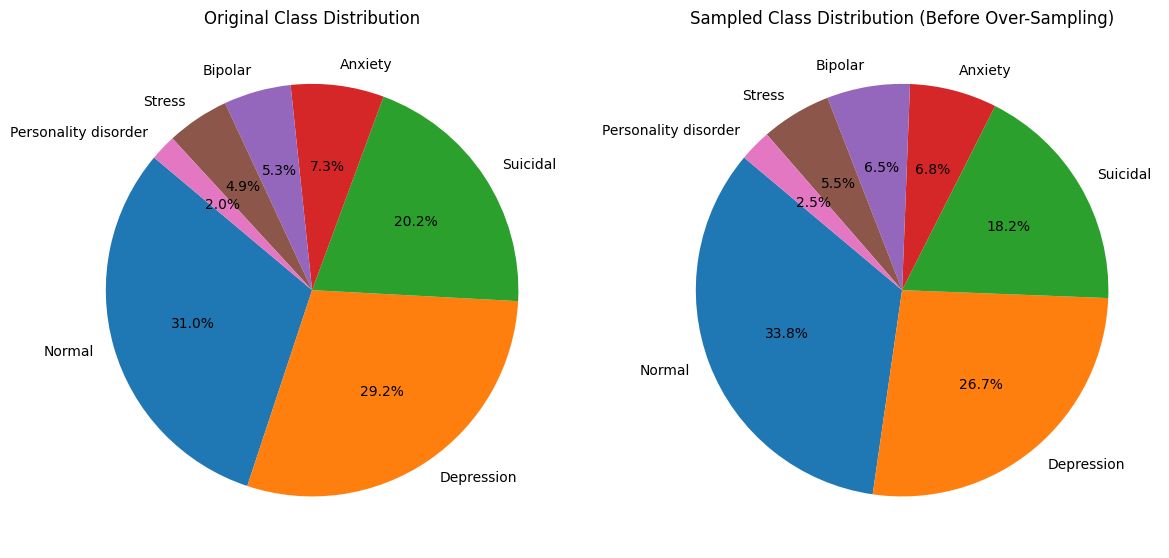

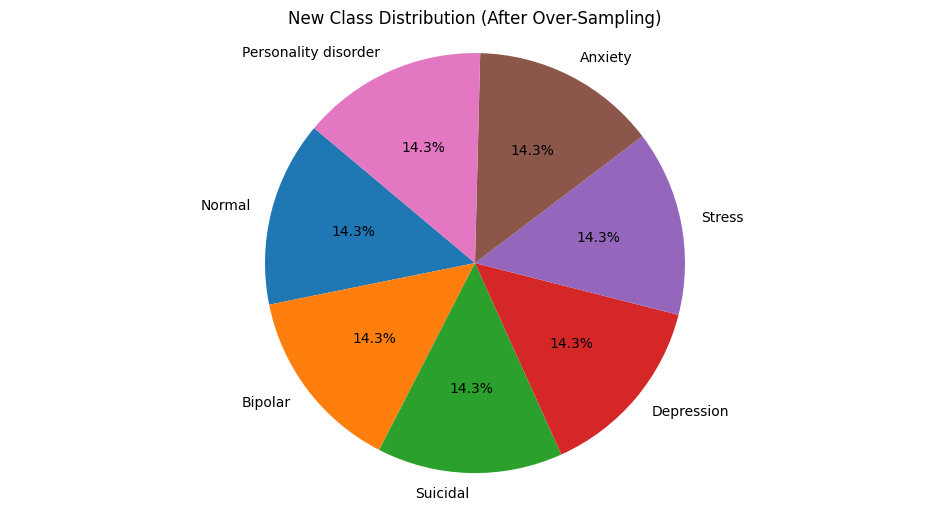

In [ ]:
import matplotlib.pyplot as plt

# Original class distribution
original_counts = df['status'].value_counts()

# Sampled dataset class distribution
df_sample = df.sample(n=600, random_state=2024)
sampled_counts = df_sample['status'].value_counts()

# Create pie chart for original class distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(original_counts, labels=original_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Original Class Distribution')

# Create pie chart for sampled class distribution
plt.subplot(1, 2, 2)
plt.pie(sampled_counts, labels=sampled_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sampled Class Distribution (Before Over-Sampling)')

plt.tight_layout()
plt.show()

# After Random Over-Sampling
from imblearn.over_sampling import RandomOverSampler

# Separate features and target variable
X = df_sample.drop('status', axis=1)
y = df_sample['status']

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = ros.fit_resample(X, y)

# Combine resampled features and target variable
df_new = pd.DataFrame(X_resampled, columns=X.columns)
df_new['status'] = y_resampled

# Create pie chart for new class distribution after Over-Sampling
new_counts = df_new['status'].value_counts()

plt.figure(figsize=(12, 6))
plt.pie(new_counts, labels=new_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('New Class Distribution (After Over-Sampling)')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

plt.show()


In [ ]:
df

status  word_count  statement_length  num_words  avg_word_length  \
0           3    1.098612          2.302585   1.098612         1.098612   
1           3    2.302585          4.158883   2.302585         1.791759   
2           3    2.639057          4.356709   2.639057         1.791759   
3           3    2.397895          4.110874   2.397895         1.791759   
4           3    2.639057          4.276666   2.639057         1.609438   
...       ...         ...               ...        ...              ...   
53038       3    5.774552          7.493317   5.774552         1.791759   
53039       3    5.288267          6.919684   5.288267         1.609438   
53040       3    2.833213          4.442651   2.833213         1.609438   
53041       3    4.304065          6.013715   4.304065         1.791759   
53042       3    4.369448          6.033086   4.369448         1.609438   

       vocabulary_size                                          statement  
0             1.098612                                               gosh  
1             2.302585       troubl sleep confus mind restless heart tune  
2             2.564949  wrong back dear forward doubt stay restless re...  
3             2.397895               ive shift focu someth el still worri  
4             2.639057                   restless restless month boy mean  
...                ...                                                ...  
53038         5.379897  nobodi take serious ive dealt depressionanxiet...  
53039         4.912655  selfish dont feel good like dont belong world ...  
53040         2.772589   way sleep better cant sleep night med didnt help  
53041         4.094345  public speak tip give present work next week m...  
53042         4.060443  realli bad door anxieti scare didnt lock door ...  

[52681 rows x 7 columns]

In [ ]:
df_new

word_count  statement_length  num_words  avg_word_length  \
0        2.397895          4.094345   2.397895         1.609438   
1        5.556828          7.211557   5.556828         1.609438   
2        4.615121          6.464588   4.615121         1.791759   
3        0.693147          2.197225   0.693147         1.386294   
4        3.610918          5.010635   3.610918         1.386294   
...           ...               ...        ...              ...   
42975    5.669881          7.329750   5.669881         1.609438   
42976    5.273000          6.836259   5.273000         1.609438   
42977    3.784190          5.375278   3.784190         1.609438   
42978    5.533389          7.230563   5.533389         1.609438   
42979    5.278115          6.957497   5.278115         1.609438   

       vocabulary_size                                          statement  \
0             2.397895               caitlinaudrey aww suck go sydney one   
1             5.176150  feel like kill still one listen convinc suffer...   
2             4.382027  hellom hellodl hello know saydl okay someth mi...   
3             0.693147                                           bodi ach   
4             3.295837  feel like believ realli go trial run see relie...   
...                ...                                                ...   
42975         5.170484  feel need take reveng isol dont care sound edg...   
42976         4.718499  went busi store today hello everyon hope your ...   
42977         3.610918  even worth like worth live life full fear avoi...   
42978         5.105945  cope gonna realli weird random want share beca...   
42979         4.859812  friend first time long time cant leav went old...   

       status  
0           0  
1           4  
2           2  
3           0  
4           1  
...       ...  
42975       6  
42976       6  
42977       6  
42978       6  
42979       6  

[42980 rows x 7 columns]

#Outliers

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/df_new_afterRandomOversampling - Sheet1.csv',encoding = 'ISO-8859-1')

# Function to identify and remove outliers using IQR
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Identifying rows that are not outliers (within 1.5 * IQR)
    filtered_df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return filtered_df

# Specify numeric columns for outlier detection
numeric_columns = ['word_count', 'statement_length', 'num_words', 'avg_word_length', 'vocabulary_size']

# Remove outliers
cleaned_numeric_data = remove_outliers_iqr(data[numeric_columns])


df_new = cleaned_numeric_data

df_new


word_count  statement_length  num_words  avg_word_length  \
0        2.397895          4.094345   2.397895         1.609438   
1        5.556828          7.211557   5.556828         1.609438   
2        4.615121          6.464588   4.615121         1.791759   
4        3.610918          5.010635   3.610918         1.386294   
5        4.521789          6.249975   4.521789         1.791759   
...           ...               ...        ...              ...   
42975    5.669881          7.329750   5.669881         1.609438   
42976    5.273000          6.836259   5.273000         1.609438   
42977    3.784190          5.375278   3.784190         1.609438   
42978    5.533389          7.230563   5.533389         1.609438   
42979    5.278115          6.957497   5.278115         1.609438   

       vocabulary_size  
0             2.397895  
1             5.176150  
2             4.382027  
4             3.295837  
5             4.174387  
...                ...  
42975         5.170484  
42976         4.718499  
42977         3.610918  
42978         5.105945  
42979         4.859812  

[41364 rows x 5 columns]

In [ ]:
# Merge the cleaned numeric data back with the original 'statement' and 'status' columns
cleaned_data = pd.concat([cleaned_numeric_data, data[['statement', 'status']].loc[cleaned_numeric_data.index]], axis=1)

# Save the cleaned dataset if needed
cleaned_data.to_csv('cleaned_data.csv', index=False)

# Check the result
print(cleaned_data.head())

   word_count  statement_length  num_words  avg_word_length  vocabulary_size  \
0    2.397895          4.094345   2.397895         1.609438         2.397895   
1    5.556828          7.211557   5.556828         1.609438         5.176150   
2    4.615121          6.464588   4.615121         1.791759         4.382027   
4    3.610918          5.010635   3.610918         1.386294         3.295837   
5    4.521789          6.249975   4.521789         1.791759         4.174387   

                                           statement  status  
0               caitlinaudrey aww suck go sydney one       0  
1  feel like kill still one listen convinc suffer...       4  
2  hellom hellodl hello know saydl okay someth mi...       2  
4  feel like believ realli go trial run see relie...       1  
5  depress realism exist matrix peopl came fine c...       1  


In [ ]:
df_new = cleaned_data

df_new


word_count  statement_length  num_words  avg_word_length  \
0        2.397895          4.094345   2.397895         1.609438   
1        5.556828          7.211557   5.556828         1.609438   
2        4.615121          6.464588   4.615121         1.791759   
4        3.610918          5.010635   3.610918         1.386294   
5        4.521789          6.249975   4.521789         1.791759   
...           ...               ...        ...              ...   
42975    5.669881          7.329750   5.669881         1.609438   
42976    5.273000          6.836259   5.273000         1.609438   
42977    3.784190          5.375278   3.784190         1.609438   
42978    5.533389          7.230563   5.533389         1.609438   
42979    5.278115          6.957497   5.278115         1.609438   

       vocabulary_size                                          statement  \
0             2.397895               caitlinaudrey aww suck go sydney one   
1             5.176150  feel like kill still one listen convinc suffer...   
2             4.382027  hellom hellodl hello know saydl okay someth mi...   
4             3.295837  feel like believ realli go trial run see relie...   
5             4.174387  depress realism exist matrix peopl came fine c...   
...                ...                                                ...   
42975         5.170484  feel need take reveng isol dont care sound edg...   
42976         4.718499  went busi store today hello everyon hope your ...   
42977         3.610918  even worth like worth live life full fear avoi...   
42978         5.105945  cope gonna realli weird random want share beca...   
42979         4.859812  friend first time long time cant leav went old...   

       status  
0           0  
1           4  
2           2  
4           1  
5           1  
...       ...  
42975       6  
42976       6  
42977       6  
42978       6  
42979       6  

[41364 rows x 7 columns]

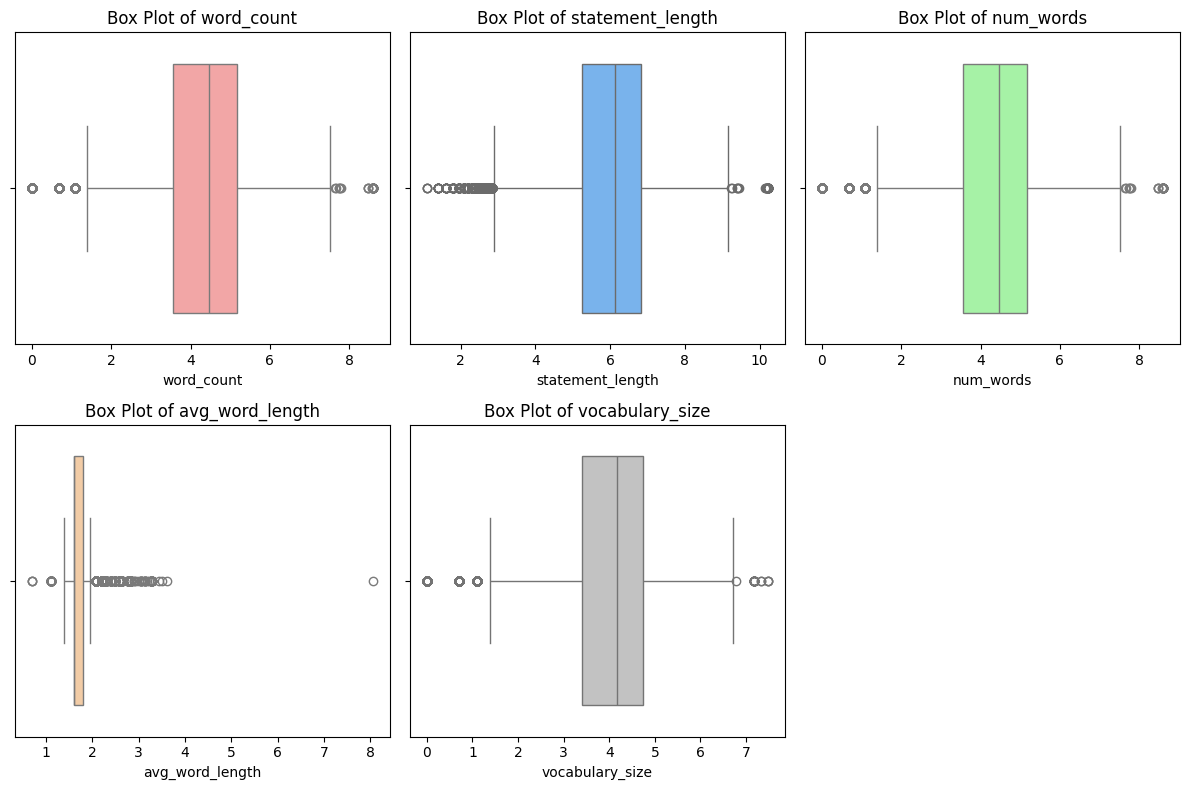

In [ ]:
#before removing outliers


import matplotlib.pyplot as plt
import seaborn as sns


numeric_columns = ['word_count', 'statement_length', 'num_words', 'avg_word_length', 'vocabulary_size']

# Define custom colors for each box plot
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C2C2C2']

# Create box plots for each numeric column with different colors
plt.figure(figsize=(12, 8))
for i, (col, color) in enumerate(zip(numeric_columns, colors), 1):
    plt.subplot(2, 3, i)  # Creating a 2x3 grid for subplots
    sns.boxplot(x=data[col], color=color)
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

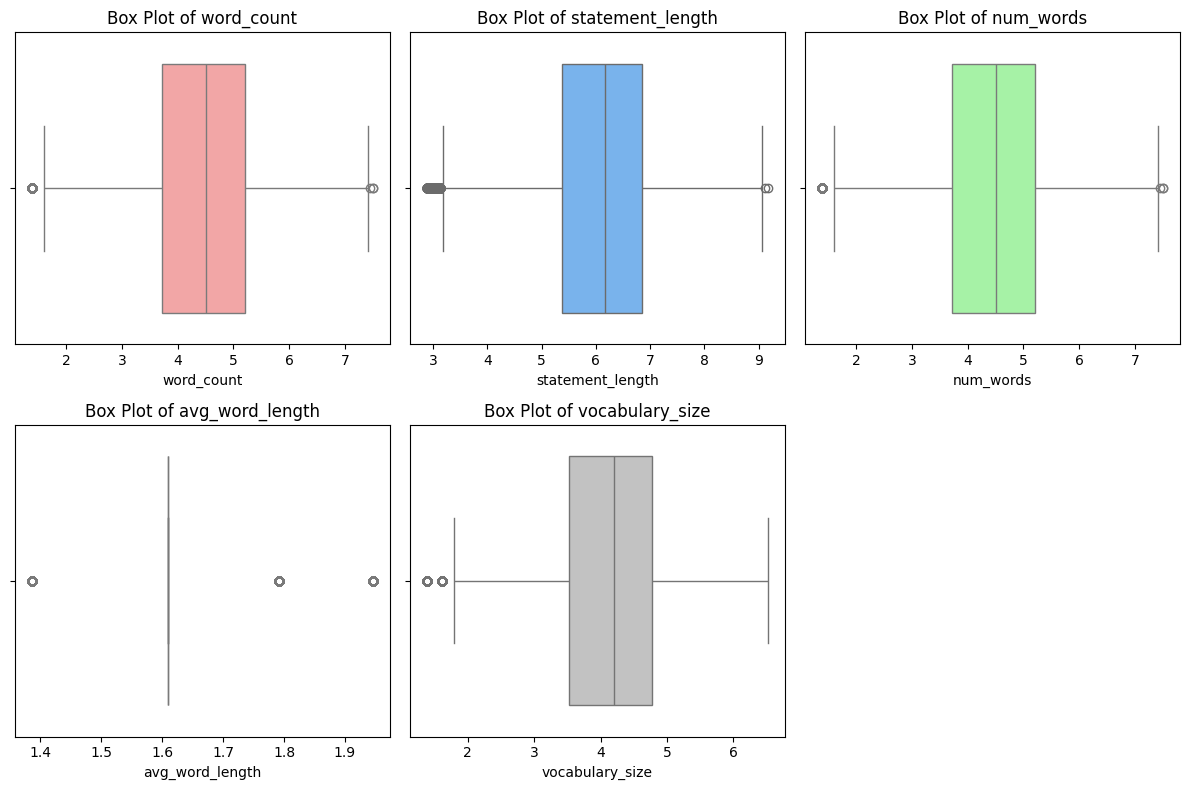

In [ ]:
#after removing outliers

import matplotlib.pyplot as plt
import seaborn as sns


numeric_columns = ['word_count', 'statement_length', 'num_words', 'avg_word_length', 'vocabulary_size']

# Define custom colors for each box plot
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C2C2C2']

# Create box plots for each numeric column with different colors
plt.figure(figsize=(12, 8))
for i, (col, color) in enumerate(zip(numeric_columns, colors), 1):
    plt.subplot(2, 3, i)  # Creating a 2x3 grid for subplots
    sns.boxplot(x=df_new[col], color=color)
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Create a new DataFrame with the cleaned numeric data and original non-numeric columns
#df_new = pd.concat([cleaned_numeric_data, data.drop(numeric_columns, axis=1)], axis=1)

# Save the cleaned DataFrame to a CSV file
df_new.to_csv('df_new_afterOutliers.csv', index=False)

In [ ]:
df_new

word_count  statement_length  num_words  avg_word_length  \
0        2.397895          4.094345   2.397895         1.609438   
1        5.556828          7.211557   5.556828         1.609438   
2        4.615121          6.464588   4.615121         1.791759   
4        3.610918          5.010635   3.610918         1.386294   
5        4.521789          6.249975   4.521789         1.791759   
...           ...               ...        ...              ...   
42975    5.669881          7.329750   5.669881         1.609438   
42976    5.273000          6.836259   5.273000         1.609438   
42977    3.784190          5.375278   3.784190         1.609438   
42978    5.533389          7.230563   5.533389         1.609438   
42979    5.278115          6.957497   5.278115         1.609438   

       vocabulary_size                                          statement  \
0             2.397895               caitlinaudrey aww suck go sydney one   
1             5.176150  feel like kill still one listen convinc suffer...   
2             4.382027  hellom hellodl hello know saydl okay someth mi...   
4             3.295837  feel like believ realli go trial run see relie...   
5             4.174387  depress realism exist matrix peopl came fine c...   
...                ...                                                ...   
42975         5.170484  feel need take reveng isol dont care sound edg...   
42976         4.718499  went busi store today hello everyon hope your ...   
42977         3.610918  even worth like worth live life full fear avoi...   
42978         5.105945  cope gonna realli weird random want share beca...   
42979         4.859812  friend first time long time cant leav went old...   

       status  
0           0  
1           4  
2           2  
4           1  
5           1  
...       ...  
42975       6  
42976       6  
42977       6  
42978       6  
42979       6  

[41364 rows x 7 columns]

#Bert

In [ ]:
df_new = pd.read_csv('/content/df_new.csv',encoding = 'ISO-8859-1')
df_new

word_count  statement_length  num_words  avg_word_length  \
0        2.397895          4.094345   2.397895         1.609438   
1        5.556828          7.211557   5.556828         1.609438   
2        4.615121          6.464588   4.615121         1.791759   
3        3.610918          5.010635   3.610918         1.386294   
4        4.521789          6.249975   4.521789         1.791759   
...           ...               ...        ...              ...   
41359    5.669881          7.329750   5.669881         1.609438   
41360    5.273000          6.836259   5.273000         1.609438   
41361    3.784190          5.375278   3.784190         1.609438   
41362    5.533389          7.230563   5.533389         1.609438   
41363    5.278115          6.957497   5.278115         1.609438   

       vocabulary_size                                          statement  \
0             2.397895               caitlinaudrey aww suck go sydney one   
1             5.176150  feel like kill still one listen convinc suffer...   
2             4.382027  hellom hellodl hello know saydl okay someth mi...   
3             3.295837  feel like believ realli go trial run see relie...   
4             4.174387  depress realism exist matrix peopl came fine c...   
...                ...                                                ...   
41359         5.170484  feel need take reveng isol dont care sound edg...   
41360         4.718499  went busi store today hello everyon hope your ...   
41361         3.610918  even worth like worth live life full fear avoi...   
41362         5.105945  cope gonna realli weird random want share beca...   
41363         4.859812  friend first time long time cant leav went old...   

       status  
0           0  
1           4  
2           2  
3           1  
4           1  
...       ...  
41359       6  
41360       6  
41361       6  
41362       6  
41363       6  

[41364 rows x 7 columns]

In [ ]:
pip install transformers torch scikit-learn numpy pandas


In [ ]:
pip install tqdm


In [ ]:
pip install tensorflow tensorflow-hub scikit-learn tqdm


In [ ]:
!pip install tensorflow tensorflow-hub

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")


text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)


embedding_model = tf.keras.Model(inputs=[text_input], outputs=[outputs['pooled_output']])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_new['statement'].astype(str), df_new['status'], test_size=0.2, random_state=42)

train_embeddings = embedding_model.predict(X_train)
test_embeddings = embedding_model.predict(X_test)

259/259 [==============================] - 335s 1s/step


In [ ]:
import pandas as pd
import numpy as np

# Assuming train_embeddings and test_embeddings are numpy arrays
# Convert them to DataFrames
train_embeddings_df = pd.DataFrame(train_embeddings)
test_embeddings_df = pd.DataFrame(test_embeddings)

# Save the embeddings to CSV files
train_embeddings_df.to_csv('train_embeddings.csv', index=False)
test_embeddings_df.to_csv('test_embeddings.csv', index=False)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import shutil

# Assuming your files are saved in the current working directory
shutil.move('train_embeddings.csv', '/content/drive/My Drive/train_embeddings.csv')
shutil.move('test_embeddings.csv', '/content/drive/My Drive/test_embeddings.csv')
shutil.move('y_train.csv', '/content/drive/My Drive/y_train.csv')
shutil.move('y_test.csv', '/content/drive/My Drive/y_test.csv')


'/content/drive/My Drive/y_test.csv'

#START HERE with imported files which are preprocessed above

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import spacy
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from sklearn.utils import resample
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#reading from imported csv's

In [ ]:
df_new  =   pd.read_csv('/content/df_new_afterOutliers.csv',encoding = 'ISO-8859-1')
df_new

word_count  statement_length  num_words  avg_word_length  \
0        2.397895          4.094345   2.397895         1.609438   
1        5.556828          7.211557   5.556828         1.609438   
2        4.615121          6.464588   4.615121         1.791759   
3        3.610918          5.010635   3.610918         1.386294   
4        4.521789          6.249975   4.521789         1.791759   
...           ...               ...        ...              ...   
41359    5.669881          7.329750   5.669881         1.609438   
41360    5.273000          6.836259   5.273000         1.609438   
41361    3.784190          5.375278   3.784190         1.609438   
41362    5.533389          7.230563   5.533389         1.609438   
41363    5.278115          6.957497   5.278115         1.609438   

       vocabulary_size                                          statement  \
0             2.397895               caitlinaudrey aww suck go sydney one   
1             5.176150  feel like kill still one listen convinc suffer...   
2             4.382027  hellom hellodl hello know saydl okay someth mi...   
3             3.295837  feel like believ realli go trial run see relie...   
4             4.174387  depress realism exist matrix peopl came fine c...   
...                ...                                                ...   
41359         5.170484  feel need take reveng isol dont care sound edg...   
41360         4.718499  went busi store today hello everyon hope your ...   
41361         3.610918  even worth like worth live life full fear avoi...   
41362         5.105945  cope gonna realli weird random want share beca...   
41363         4.859812  friend first time long time cant leav went old...   

       status  
0           0  
1           4  
2           2  
3           1  
4           1  
...       ...  
41359       6  
41360       6  
41361       6  
41362       6  
41363       6  

[41364 rows x 7 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_new['statement'].astype(str), df_new['status'], test_size=0.2, random_state=42)

In [ ]:
train_embeddings = pd.read_csv('/content/train_embeddings.csv',encoding = 'ISO-8859-1')
test_embeddings = pd.read_csv('/content/test_embeddings.csv',encoding = 'ISO-8859-1')

#Stacking

In [ ]:
pip install lightgbm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 35.5 MB/s eta 0:00:00


In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 MB 5.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#!pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

# Fit and transform the TF-IDF vectors
vectorizer.fit(X_train)  # Fit to training data
X_train_tfidf = vectorizer.transform(X_train)  # Transform training data
X_test_tfidf = vectorizer.transform(X_test)    # Transform testing data

# Concatenate BERT embeddings and TF-IDF features
X_train_combined = np.hstack((train_embeddings, X_train_tfidf.toarray()))
X_test_combined = np.hstack((test_embeddings, X_test_tfidf.toarray()))

# 1. Normalize/Scale the Combined Features
#scaler = StandardScaler()

# Fit on the training data and transform both training and test data
#X_train_combined_scaled = scaler.fit_transform(X_train_combined)
#X_test_combined_scaled = scaler.transform(X_test_combined)



In [ ]:
import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier

# Define base models
base_models = [
    ('lgbm', lgb.LGBMClassifier(n_estimators=100, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]

# Define XGBoost as final estimator
final_estimator = XGBClassifier(
    reg_alpha=0.5,  # Equivalent to alpha
    reg_lambda=1.0,  # Equivalent to lambda_
    learning_rate=0.05,
    n_estimators=450,
    random_state=42
)

# Stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=final_estimator)

# Train the stacking model
stacking_model.fit(X_train_combined, y_train)

# Make predictions
y_pred = stacking_model.predict(X_test_combined)

# Print accuracy
print(f"Ensemble Model Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.607653 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 417549
[LightGBM] [Info] Number of data points in the train set: 33091, number of used features: 5230
[LightGBM] [Info] Start training from score -2.074708
[LightGBM] [Info] Start training from score -1.917400
[LightGBM] [Info] Start training from score -1.911660
[LightGBM] [Info] Start training from score -1.935030
[LightGBM] [Info] Start training from score -1.908802
[LightGBM] [Info] Start training from score -1.940275
[LightGBM] [Info] Start training from score -1.943224
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.497981 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 393896
[LightGBM] [Info] Number of data points in the train set: 26472, number of used features: 4735
[LightGBM] [Info] Start training fro

In [ ]:
print(f"Ensemble Model Accuracy: {accuracy_score(y_test, y_pred) * 100:.4f}%")

Ensemble Model Accuracy: 93.2068%


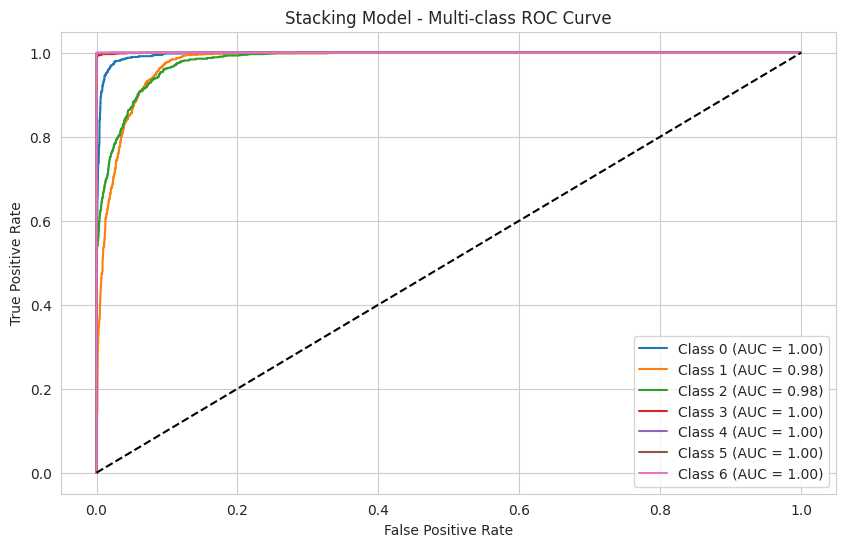

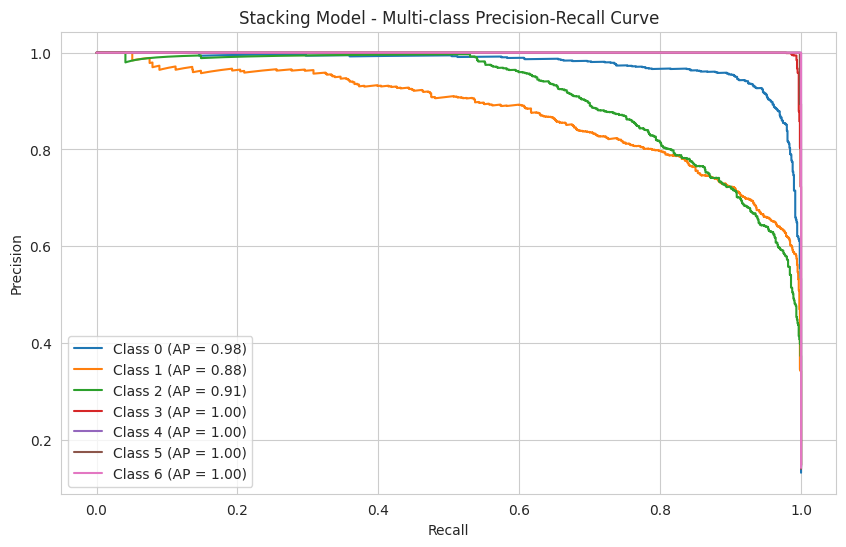

In [ ]:
# Ensure y_pred_prob is correctly defined
y_pred_prob = stacking_model.predict_proba(X_test_combined)  # Get probability predictions

# Binarize labels for multi-class evaluation
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# --- Multi-class ROC Curve ---
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stacking Model - Multi-class ROC Curve')
plt.legend(loc='lower right')
plt.show()

# --- Multi-class Precision-Recall Curve ---
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    ap_score = average_precision_score(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(recall, precision, label=f'Class {i} (AP = {ap_score:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Stacking Model - Multi-class Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


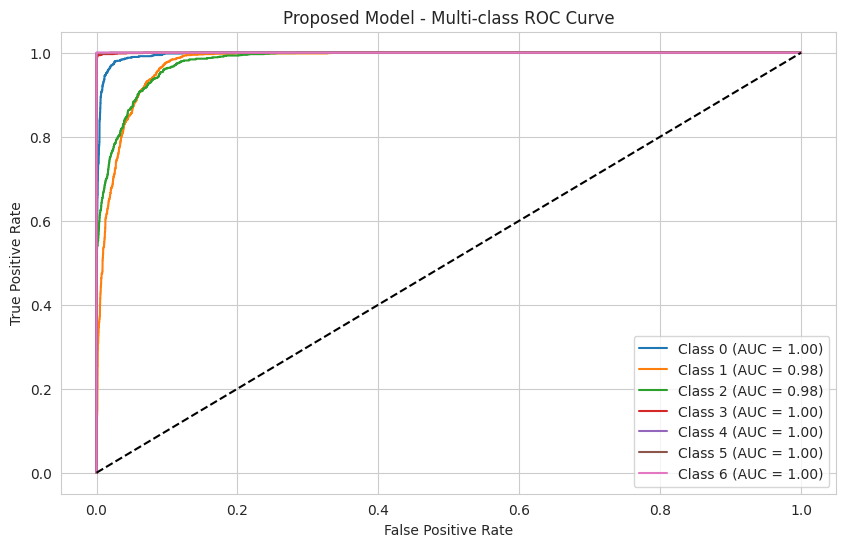

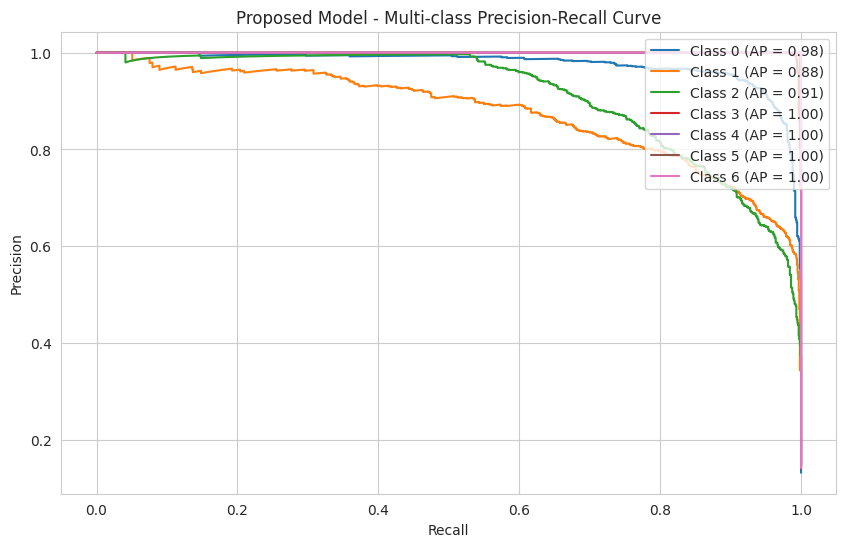

Confusion Matrix:
 [[1036   36   16    2    0    1    0]
 [  53  966  195    5    2    0    0]
 [  40  197  957    0    0    0    0]
 [   2   11    0 1214    0    0    0]
 [   0    0    0    0 1210    0    0]
 [   0    2    0    0    0 1154    0]
 [   0    0    0    0    0    0 1174]]
Model: stacking Classifier
Disorder: (Specify disorder name if applicable)
Test Accuracy: 0.9321
Train Accuracy: 0.9984

Test Metrics for each class:
Class 0:
  Precision: 0.9160
  Recall: 0.9496
  F1 Score: 0.9325
  Accuracy: 0.9496
Class 1:
  Precision: 0.7970
  Recall: 0.7912
  F1 Score: 0.7941
  Accuracy: 0.7912
Class 2:
  Precision: 0.8193
  Recall: 0.8015
  F1 Score: 0.8103
  Accuracy: 0.8015
Class 3:
  Precision: 0.9943
  Recall: 0.9894
  F1 Score: 0.9918
  Accuracy: 0.9894
Class 4:
  Precision: 0.9983
  Recall: 1.0000
  F1 Score: 0.9992
  Accuracy: 1.0000
Class 5:
  Precision: 0.9991
  Recall: 0.9983
  F1 Score: 0.9987
  Accuracy: 0.9983
Class 6:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.

In [ ]:

# Get probability estimates for ROC & Precision-Recall curves
y_pred_prob = stacking_model.predict_proba(X_test_combined)
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Plot ROC Curves for each class
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Proposed Model - Multi-class ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curves for each class
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    ap_score = average_precision_score(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(recall, precision, label=f'Class {i} (AP = {ap_score:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Proposed Model - Multi-class Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# Make predictions on test and train sets
y_test_pred = stacking_model.predict(X_test_combined)
y_train_pred = stacking_model.predict(X_train_combined)

# Calculate Test and Train Accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print confusion matrix to get class-specific details
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report for each class
test_classification_report = classification_report(y_test, y_test_pred, output_dict=True)
train_classification_report = classification_report(y_train, y_train_pred, output_dict=True)

# Calculate class-wise accuracy
class_wise_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

# Display the results for each class
print("Model: stacking Classifier")
print("Disorder: (Specify disorder name if applicable)")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f}")

# For each class, print Precision, Recall, F1 Score, and Accuracy
print("\nTest Metrics for each class:")
for i, class_label in enumerate(test_classification_report.keys()):
    if class_label not in ['accuracy', 'macro avg', 'weighted avg']:  # Ignore aggregated metrics
        print(f"Class {class_label}:")
        print(f"  Precision: {test_classification_report[class_label]['precision']:.4f}")
        print(f"  Recall: {test_classification_report[class_label]['recall']:.4f}")
        print(f"  F1 Score: {test_classification_report[class_label]['f1-score']:.4f}")
        print(f"  Accuracy: {class_wise_accuracy[i]:.4f}")

print("\nTrain Metrics for each class:")
for class_label in train_classification_report.keys():
    if class_label not in ['accuracy', 'macro avg', 'weighted avg']:  # Ignore aggregated metrics
        print(f"Class {class_label}:")
        print(f"  Precision: {train_classification_report[class_label]['precision']:.4f}")
        print(f"  Recall: {train_classification_report[class_label]['recall']:.4f}")
        print(f"  F1 Score: {train_classification_report[class_label]['f1-score']:.4f}")


#K-Cross Validation

In [ ]:
#K-cros validation

from sklearn.model_selection import cross_val_score
import numpy as np

# Perform cross-validation
cv_scores = cross_val_score(stacking_model, X_train_combined, y_train, cv=5)  # Change cv to your desired number of folds



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.455887 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 393896
[LightGBM] [Info] Number of data points in the train set: 26472, number of used features: 4735
[LightGBM] [Info] Start training from score -2.074919
[LightGBM] [Info] Start training from score -1.917164
[LightGBM] [Info] Start training from score -1.911783
[LightGBM] [Info] Start training from score -1.935052
[LightGBM] [Info] Start training from score -1.908721
[LightGBM] [Info] Start training from score -1.940297
[LightGBM] [Info] Start training from score -1.943194
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.383406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 371319
[LightGBM] [Info] Number of data points in the train set: 21177, number of used features: 4314
[LightGBM] [Info] Start training fro

In [ ]:
# Print the cross-validation results
print(f"Cross-Validation Accuracy Scores: {[f'{score * 100:.2f}%' for score in cv_scores]}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores) * 100:.2f}%")

Cross-Validation Accuracy Scores: ['91.43%', '91.15%', '91.36%', '91.07%', '91.21%']
Mean Cross-Validation Accuracy: 91.24%


#Data Visualisation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


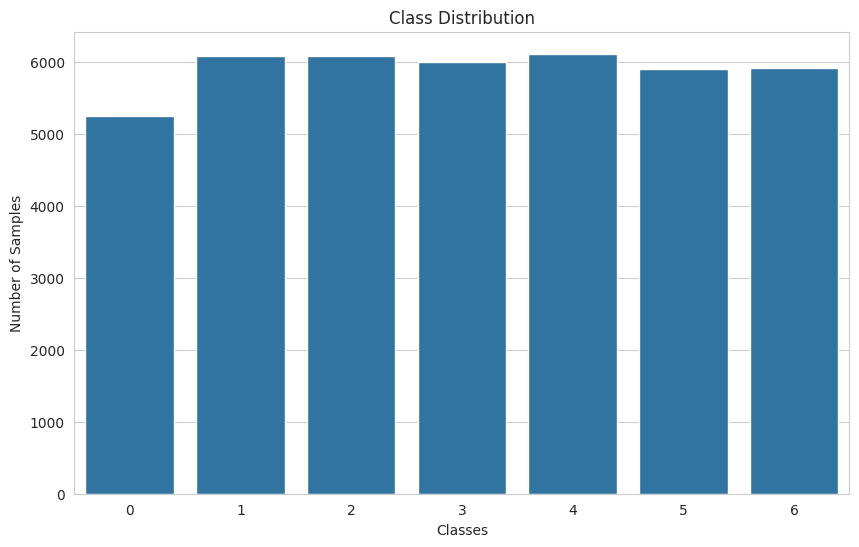

In [ ]:
#Visualize Class Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='status', data=df_new)
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.show()


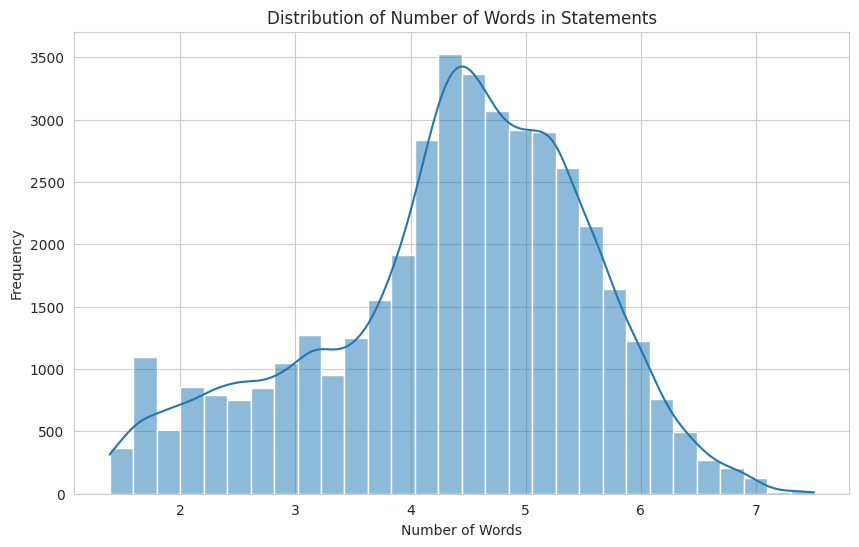

In [ ]:
#Word Count Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_new['num_words'], kde=True, bins=30)
plt.title('Distribution of Number of Words in Statements')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


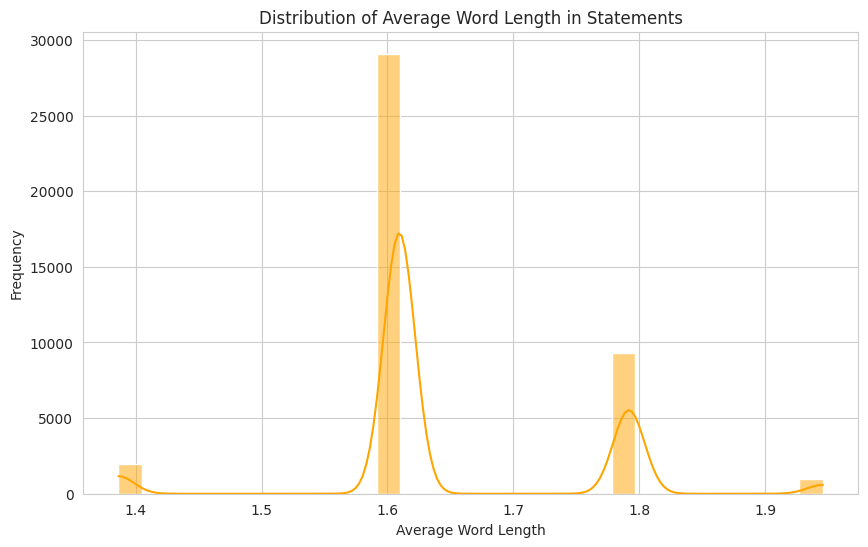

In [ ]:
#Average Word Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_new['avg_word_length'], kde=True, bins=30, color='orange')
plt.title('Distribution of Average Word Length in Statements')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.show()


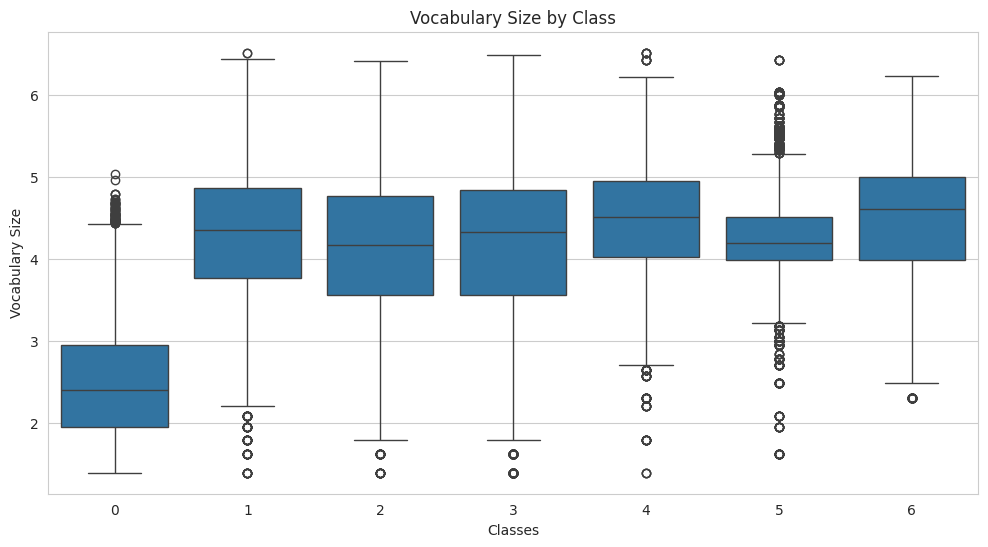

In [ ]:
#Vocabulary Size vs. Status
plt.figure(figsize=(12, 6))
sns.boxplot(x='status', y='vocabulary_size', data=df_new)
plt.title('Vocabulary Size by Class')
plt.xlabel('Classes')
plt.ylabel('Vocabulary Size')
plt.show()


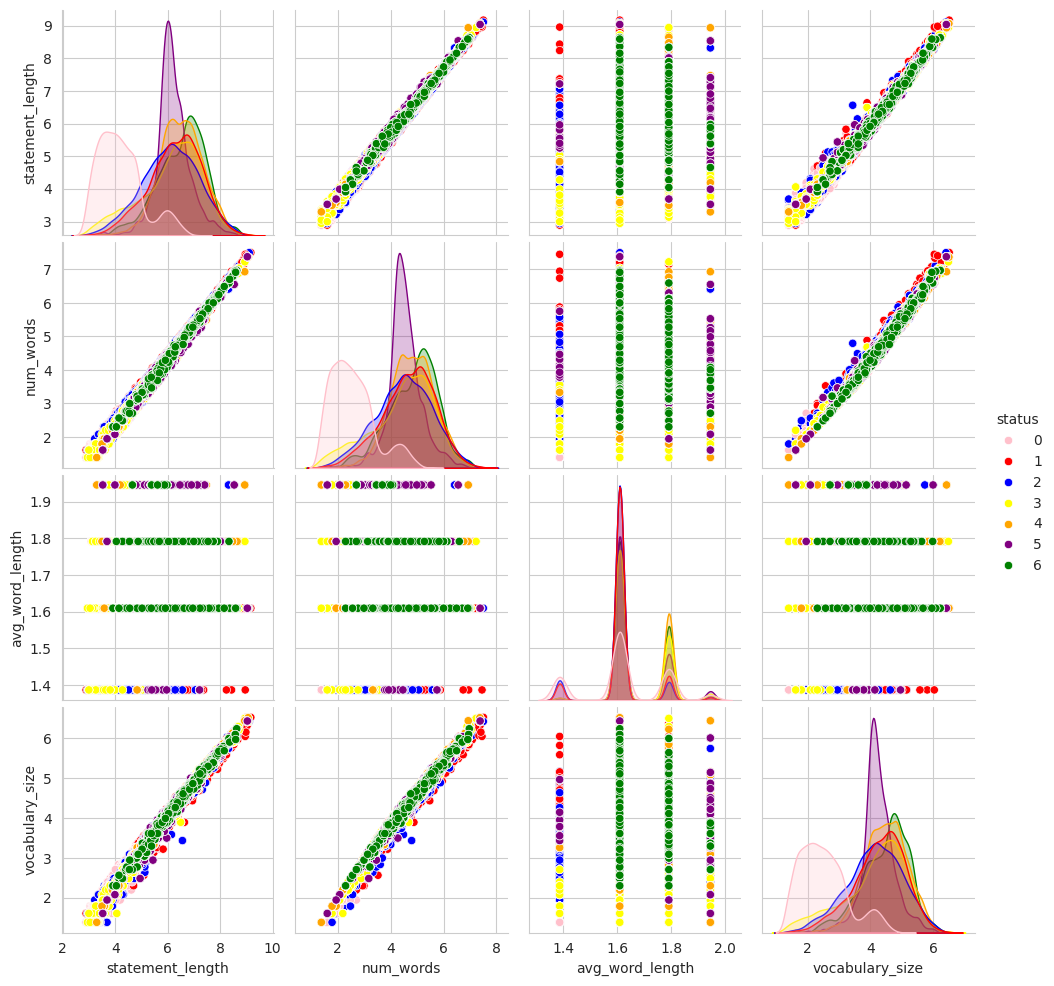

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a bright color palette (red, green, blue, yellow, etc.)
bright_colors = ["pink", "red", "blue", "yellow", "orange", "purple", "green"]

# Pairplot with bright colors
sns.pairplot(df_new,
             vars=['statement_length', 'num_words', 'avg_word_length', 'vocabulary_size'],
             hue='status',
             palette=bright_colors)

plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Train a simple Random Forest model
X = df_new[['statement_length', 'num_words', 'avg_word_length', 'vocabulary_size']]
y = df_new['status']
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display as a table
print(feature_importances)


            Feature  Importance
0  statement_length    0.441016
1         num_words    0.281166
3   vocabulary_size    0.253238
2   avg_word_length    0.024580


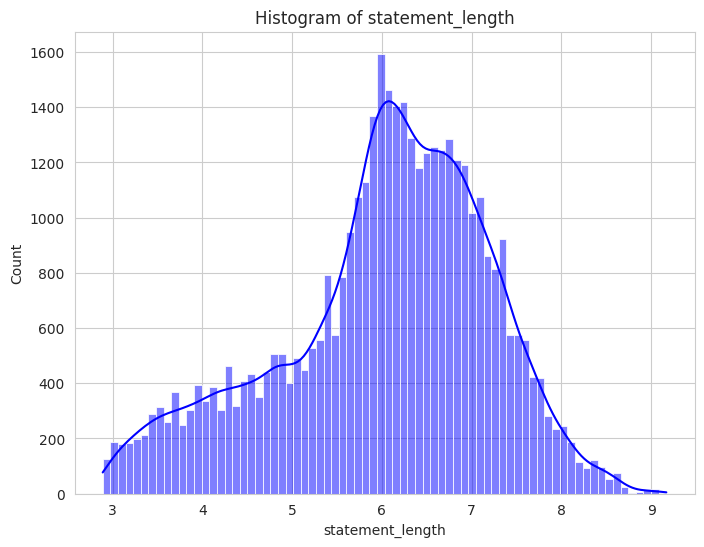

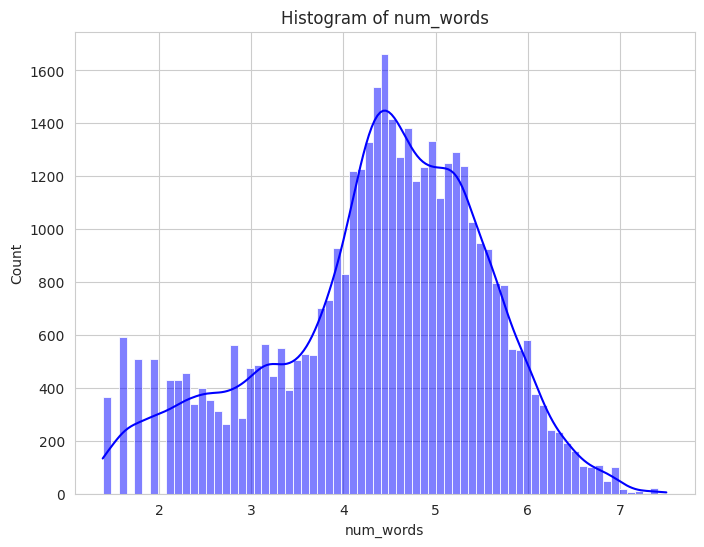

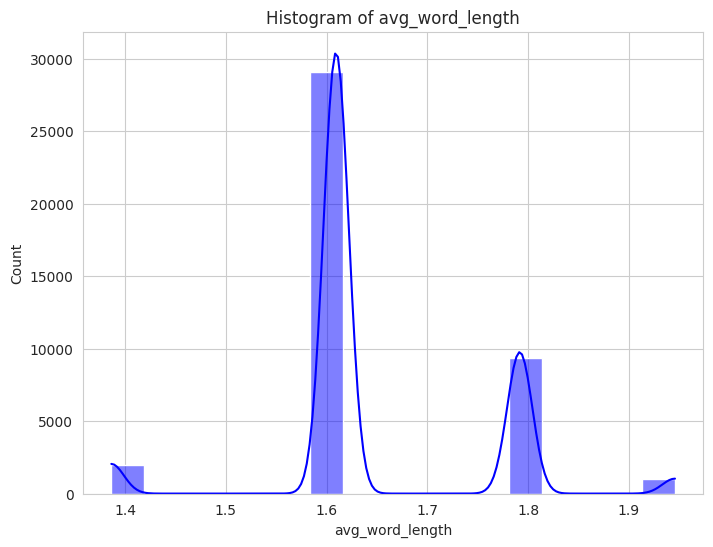

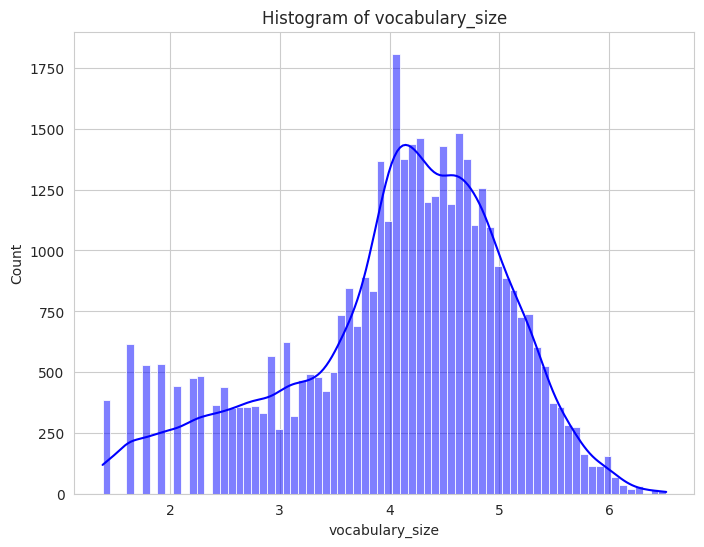

In [ ]:
features = ['statement_length', 'num_words', 'avg_word_length', 'vocabulary_size']

for feature in features:
    plt.figure(figsize=(8,6))
    sns.histplot(df_new[feature], kde=True, color='blue')
    plt.title(f"Histogram of {feature}")
    plt.show()


In [ ]:
import pandas as pd

# Summary statistics for relevant features
summary_table = df_new[['statement_length', 'num_words', 'avg_word_length', 'vocabulary_size']].describe()

# Format the table
summary_table = summary_table.T  # Transpose for better readability
summary_table = summary_table[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
summary_table.columns = ['Mean', 'Std Dev', 'Min', '25th Percentile', 'Median', '75th Percentile', 'Max']

# Display the table
print(summary_table)


                      Mean   Std Dev       Min  25th Percentile    Median  \
statement_length  6.017650  1.183002  2.890372         5.370638  6.167516   
num_words         4.363593  1.178174  1.386294         3.713572  4.510860   
avg_word_length   1.648008  0.105169  1.386294         1.609438  1.609438   
vocabulary_size   4.056592  1.005692  1.386294         3.526361  4.204693   

                  75th Percentile       Max  
statement_length         6.852243  9.167955  
num_words                5.204007  7.505492  
avg_word_length          1.609438  1.945910  
vocabulary_size          4.770685  6.519147  


#Results

Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 93.21%


Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[1036,   36,   16,    2,    0,    1,    0],
       [  53,  966,  195,    5,    2,    0,    0],
       [  40,  197,  957,    0,    0,    0,    0],
       [   2,   11,    0, 1214,    0,    0,    0],
       [   0,    0,    0,    0, 1210,    0,    0],
       [   0,    2,    0,    0,    0, 1154,    0],
       [   0,    0,    0,    0,    0,    0, 1174]])

Confusion matrix shape: (7, 7)


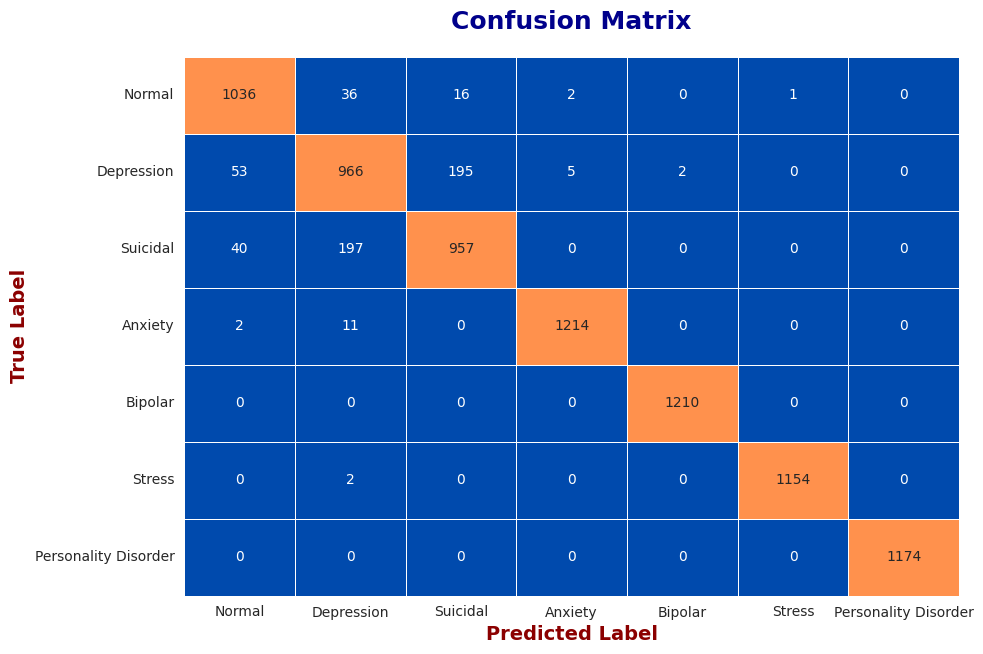

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix

# Example y_test and y_pred (replace these with your actual data)
# y_test = ...  # True labels
# y_pred = ...  # Predicted labels

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Check the shape of the confusion matrix
print(f"Confusion matrix shape: {conf_matrix.shape}")

# Custom labels for the classes
class_labels = ['Normal', 'Depression', 'Suicidal', 'Anxiety', 'Bipolar', 'Stress', 'Personality Disorder']

# Plotting the confusion matrix with specified colors
custom_cmap = ListedColormap(['#004aad', '#00bf63', '#ff914d'])
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_cmap, cbar=False,
            linewidths=0.5, linecolor='white',
            xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix', fontsize=18, weight='bold', color='darkblue', pad=20)
plt.xlabel('Predicted Label', fontsize=14, weight='bold', color='darkred')
plt.ylabel('True Label', fontsize=14, weight='bold', color='darkred')
#plt.xticks(fontsize=12, weight='bold', rotation=45, ha='right')
#plt.yticks(fontsize=12, weight='bold', rotation=0)
#plt.tight_layout()
plt.show()


Classification Report

In [ ]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(y_test, y_pred, target_names=np.unique(y_test).astype(str))
print(report)


              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1091
           1       0.80      0.79      0.79      1221
           2       0.82      0.80      0.81      1194
           3       0.99      0.99      0.99      1227
           4       1.00      1.00      1.00      1210
           5       1.00      1.00      1.00      1156
           6       1.00      1.00      1.00      1174

    accuracy                           0.93      8273
   macro avg       0.93      0.93      0.93      8273
weighted avg       0.93      0.93      0.93      8273



Accuracy, sensitivity, and specificity

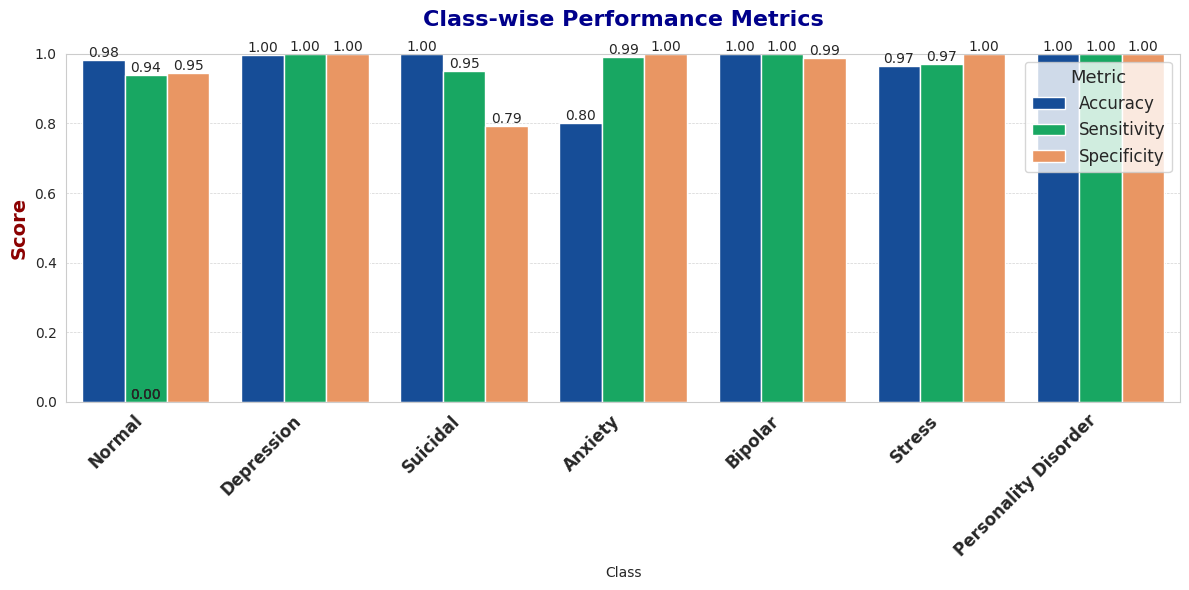

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming y_test and y_pred are your true and predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Number of classes
num_classes = conf_matrix.shape[0]

# Calculate metrics for each class
accuracies = []
sensitivities = []
specificities = []

for i in range(num_classes):
    TP = conf_matrix[i, i]  # True Positive
    FP = np.sum(conf_matrix[:, i]) - TP  # False Positive
    FN = np.sum(conf_matrix[i, :]) - TP  # False Negative
    TN = np.sum(conf_matrix) - (TP + FP + FN)  # True Negative

    accuracy = (TP + TN) / np.sum(conf_matrix)
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    accuracies.append(accuracy)
    sensitivities.append(sensitivity)
    specificities.append(specificity)

# Prepare data for visualization
metrics = ['Accuracy', 'Sensitivity', 'Specificity']
class_labels = ['Normal', 'Depression', 'Suicidal', 'Anxiety', 'Bipolar', 'Stress', 'Personality Disorder']

# Create a DataFrame for better handling
metric_values = pd.DataFrame({
    'Class': np.repeat(class_labels, len(metrics)),
    'Metric': metrics * num_classes,
    'Value': accuracies + sensitivities + specificities
})

# Create a grouped bar plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
palette = ['#004aad', '#00bf63', '#ff914d']  # Custom color palette
bar_plot = sns.barplot(data=metric_values, x='Class', y='Value', hue='Metric', palette=palette)

# Adding data labels on top of bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=10)

# Set title and labels
plt.title('Class-wise Performance Metrics', fontsize=16, weight='bold', color='darkblue', pad=20)
plt.ylabel('Score', fontsize=14, weight='bold', color='darkred')
plt.ylim(0, 1)  # Set y-axis limits for better visualization
plt.xticks(fontsize=12, weight='bold', rotation=45, ha='right')
plt.legend(title='Metric', fontsize=12, title_fontsize='13')

# Lighter border effect
plt.grid(axis='y', color='lightgray', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()
